In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
import json

In [3]:
with open(r'C:\Users\ASUS\Desktop\CAPSTONE PROJECT\Group2 capstone\behaviour.json') as file:
    data = json.load(file)

In [4]:
data_list = []

for item in data:
    for key, value in item.items():
        
        id_num = key[3:]
         
        new_item = {
            'ID': id_num,
            'Recency': value['Recency'],
            'MntWines': value['MntWines'],
            'MntFruits': value['MntFruits'],
            'MntMeatProducts': value['MntMeatProducts'],
            'MntFishProducts': value['MntFishProducts'],
            'MntSweetProducts': value['MntSweetProducts'],
            'MntGoldProds': value['MntGoldProds'],
            'NumDealsPurchases':value['NumDealsPurchases'],
            'NumWebPurchases':value['NumWebPurchases'],
            'NumCatalogPurchases':value['NumCatalogPurchases'],
            'NumStorePurchases':value['NumStorePurchases'],
            'NumWebVisitsMonth':value['NumWebVisitsMonth']
            
              }
        

    
   
         # Append the new dictionary to the data list
    data_list.append(new_item)
        

In [5]:
# Create a new DataFrame from the data list for behaviour
df = pd.DataFrame(data_list)
df

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1826,0,189,104,379,111,189,218,1,4,4,6,1
1,1,0,464,5,64,7,0,37,1,7,3,7,5
2,10476,0,134,11,59,15,2,30,1,3,2,5,2
3,1386,0,10,0,1,0,0,0,1,1,0,2,7
4,5371,0,6,16,24,11,0,34,2,3,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,372,18,126,47,48,78,2,5,2,11,4
2236,5263,99,5,10,13,3,8,16,1,1,0,3,8
2237,22,99,185,2,88,15,5,14,2,6,1,5,8
2238,528,99,267,38,701,149,165,63,1,5,4,10,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   object
 1   Recency              2240 non-null   int64 
 2   MntWines             2240 non-null   int64 
 3   MntFruits            2240 non-null   int64 
 4   MntMeatProducts      2240 non-null   int64 
 5   MntFishProducts      2240 non-null   int64 
 6   MntSweetProducts     2240 non-null   int64 
 7   MntGoldProds         2240 non-null   int64 
 8   NumDealsPurchases    2240 non-null   int64 
 9   NumWebPurchases      2240 non-null   int64 
 10  NumCatalogPurchases  2240 non-null   int64 
 11  NumStorePurchases    2240 non-null   int64 
 12  NumWebVisitsMonth    2240 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 227.6+ KB


In [7]:
with open(r'C:\Users\ASUS\Desktop\CAPSTONE PROJECT\Group2 capstone\campaign.json') as file:
    data1 = json.load(file)
    
    data_list1 = []

for item in data1:
    for key, value in item.items():
       
        id_num = key[3:]
        new_item1 = {
            'ID': id_num,
            'AcceptedCmp1': value['AcceptedCmp1'],
            'AcceptedCmp2': value['AcceptedCmp2'],
            'AcceptedCmp3': value['AcceptedCmp3'],
            'AcceptedCmp4': value['AcceptedCmp4'],
            'AcceptedCmp5': value['AcceptedCmp5'],
            'Response': value['Response'],
            'Complain': value['Complain']
        }
        
         # Append the new dictionary to the data list
        data_list1.append(new_item1)
        

In [8]:
# Create a new DataFrame from the data list for behaviour
df2 = pd.DataFrame(data_list1)
df2

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,0,0,0,0,0,1,0
1,1,0,1,0,0,0,1,0
2,10476,0,0,0,0,0,0,0
3,1386,0,0,0,0,0,0,0
4,5371,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
2235,10142,0,0,0,0,0,0,0
2236,5263,0,0,0,0,0,0,0
2237,22,0,0,0,0,0,0,0
2238,528,0,0,0,0,0,0,0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            2240 non-null   object
 1   AcceptedCmp1  2240 non-null   int64 
 2   AcceptedCmp2  2240 non-null   int64 
 3   AcceptedCmp3  2240 non-null   int64 
 4   AcceptedCmp4  2240 non-null   int64 
 5   AcceptedCmp5  2240 non-null   int64 
 6   Response      2240 non-null   int64 
 7   Complain      2240 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 140.1+ KB


In [10]:
df3 =pd.read_csv(r'C:\Users\ASUS\Desktop\CAPSTONE PROJECT\Group2 capstone\demographics.txt', sep='\t')
df3

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP
...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,IND


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2240 non-null   int64 
 1   Year_Birth      2240 non-null   int64 
 2   Education       2240 non-null   object
 3   Marital_Status  2240 non-null   object
 4    Income         2216 non-null   object
 5   Kidhome         2240 non-null   int64 
 6   Teenhome        2240 non-null   int64 
 7   Dt_Customer     2240 non-null   object
 8   Country         2240 non-null   object
dtypes: int64(4), object(5)
memory usage: 157.6+ KB


In [12]:
df['ID'] = df['ID'].astype(str)
df2['ID'] = df2['ID'].astype(str)
df3['ID'] = df3['ID'].astype(str)

In [13]:

df_data = pd.merge(df, df2, on='ID', how='outer')
df_data = pd.merge(df_data, df3, on='ID', how='outer')
df_data


,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Complain,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,0,189,104,379,111,189,218,1,4,...,1,0,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,0,464,5,64,7,0,37,1,7,...,1,0,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,0,134,11,59,15,2,30,1,3,...,0,0,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,0,10,0,1,0,0,0,1,1,...,0,0,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,0,6,16,24,11,0,34,2,3,...,1,0,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,372,18,126,47,48,78,2,5,...,0,0,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,US
2236,5263,99,5,10,13,3,8,16,1,1,...,0,0,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,SP
2237,22,99,185,2,88,15,5,14,2,6,...,0,0,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,SP
2238,528,99,267,38,701,149,165,63,1,5,...,0,0,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,IND


In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   object
 1   Recency              2240 non-null   int64 
 2   MntWines             2240 non-null   int64 
 3   MntFruits            2240 non-null   int64 
 4   MntMeatProducts      2240 non-null   int64 
 5   MntFishProducts      2240 non-null   int64 
 6   MntSweetProducts     2240 non-null   int64 
 7   MntGoldProds         2240 non-null   int64 
 8   NumDealsPurchases    2240 non-null   int64 
 9   NumWebPurchases      2240 non-null   int64 
 10  NumCatalogPurchases  2240 non-null   int64 
 11  NumStorePurchases    2240 non-null   int64 
 12  NumWebVisitsMonth    2240 non-null   int64 
 13  AcceptedCmp1         2240 non-null   int64 
 14  AcceptedCmp2         2240 non-null   int64 
 15  AcceptedCmp3         2240 non-null   int64 
 16  Accept

In [15]:
df_data.shape

(2240, 28)

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   object
 1   Recency              2240 non-null   int64 
 2   MntWines             2240 non-null   int64 
 3   MntFruits            2240 non-null   int64 
 4   MntMeatProducts      2240 non-null   int64 
 5   MntFishProducts      2240 non-null   int64 
 6   MntSweetProducts     2240 non-null   int64 
 7   MntGoldProds         2240 non-null   int64 
 8   NumDealsPurchases    2240 non-null   int64 
 9   NumWebPurchases      2240 non-null   int64 
 10  NumCatalogPurchases  2240 non-null   int64 
 11  NumStorePurchases    2240 non-null   int64 
 12  NumWebVisitsMonth    2240 non-null   int64 
 13  AcceptedCmp1         2240 non-null   int64 
 14  AcceptedCmp2         2240 non-null   int64 
 15  AcceptedCmp3         2240 non-null   int64 
 16  Accept

In [17]:
df_data.describe()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Year_Birth,Kidhome,Teenhome
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,...,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,0.009375,1968.805804,0.444196,0.506250
std,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,...,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.096391,11.984069,0.538398,0.544538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1893.000000,0.000000,0.000000
25%,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1959.000000,0.000000,0.000000
50%,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,0.000000
75%,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1977.000000,1.000000,1.000000
max,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1996.000000,2.000000,2.000000


In [18]:
df_data.rename(columns ={" Income ":"Income"})
df_data

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Complain,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,0,189,104,379,111,189,218,1,4,...,1,0,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,0,464,5,64,7,0,37,1,7,...,1,0,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,0,134,11,59,15,2,30,1,3,...,0,0,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,0,10,0,1,0,0,0,1,1,...,0,0,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,0,6,16,24,11,0,34,2,3,...,1,0,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,372,18,126,47,48,78,2,5,...,0,0,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,US
2236,5263,99,5,10,13,3,8,16,1,1,...,0,0,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,SP
2237,22,99,185,2,88,15,5,14,2,6,...,0,0,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,SP
2238,528,99,267,38,701,149,165,63,1,5,...,0,0,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,IND


In [19]:
# Removing spaces from columns name & removing '$' sign from income.

df_data.columns = df_data.columns.str.strip()
df_data['Income'] = df_data['Income'].str.replace('$', '').str.replace(',', '')
df_data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\1432440672.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_data['Income'] = df_data['Income'].str.replace('$', '').str.replace(',', '')


,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Complain,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,0,189,104,379,111,189,218,1,4,...,1,0,1970,Graduation,Divorced,84835.00,0,0,6/16/14,SP
1,1,0,464,5,64,7,0,37,1,7,...,1,0,1961,Graduation,Single,57091.00,0,0,6/15/14,CA
2,10476,0,134,11,59,15,2,30,1,3,...,0,0,1958,Graduation,Married,67267.00,0,1,5/13/14,US
3,1386,0,10,0,1,0,0,0,1,1,...,0,0,1967,Graduation,Together,32474.00,1,1,5/11/14,AUS
4,5371,0,6,16,24,11,0,34,2,3,...,1,0,1989,Graduation,Single,21474.00,1,0,4/8/14,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,372,18,126,47,48,78,2,5,...,0,0,1976,PhD,Divorced,66476.00,0,1,3/7/13,US
2236,5263,99,5,10,13,3,8,16,1,1,...,0,0,1977,2n Cycle,Married,31056.00,1,0,1/22/13,SP
2237,22,99,185,2,88,15,5,14,2,6,...,0,0,1976,Graduation,Divorced,46310.00,1,0,12/3/12,SP
2238,528,99,267,38,701,149,165,63,1,5,...,0,0,1978,Graduation,Married,65819.00,0,0,11/29/12,IND


In [20]:
df_data['Income'] = df_data['Income'].astype(float)
df_data['Kidhome'] = df_data['Kidhome'].astype(str)
df_data['Teenhome'] = df_data['Teenhome'].astype(str)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Recency              2240 non-null   int64  
 2   MntWines             2240 non-null   int64  
 3   MntFruits            2240 non-null   int64  
 4   MntMeatProducts      2240 non-null   int64  
 5   MntFishProducts      2240 non-null   int64  
 6   MntSweetProducts     2240 non-null   int64  
 7   MntGoldProds         2240 non-null   int64  
 8   NumDealsPurchases    2240 non-null   int64  
 9   NumWebPurchases      2240 non-null   int64  
 10  NumCatalogPurchases  2240 non-null   int64  
 11  NumStorePurchases    2240 non-null   int64  
 12  NumWebVisitsMonth    2240 non-null   int64  
 13  AcceptedCmp1         2240 non-null   int64  
 14  AcceptedCmp2         2240 non-null   int64  
 15  AcceptedCmp3         2240 non-null   i

# Checking of duplicate records in dataframe

In [21]:

duplicate_ids = df_data[df_data.duplicated(subset=['ID'], keep=False)]

# Display duplicate IDs
if not duplicate_ids.empty:
    print("Duplicate Customer IDs:")
    print(duplicate_ids[['Customer_ID']])
else:
    print("No duplicate Customer IDs found.")

No duplicate Customer IDs found.


# Checking of null values

In [22]:

df_data.isnull().sum()

# Only Income has 24 null values .

ID                      0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Country                 0
dtype: int64

In [23]:
# Percentage of missing values
round((df_data['Income'].isna().sum()/len(df_data["Income"]))*100,2)

1.07

# Univariate Analysis

In [24]:
df_data.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

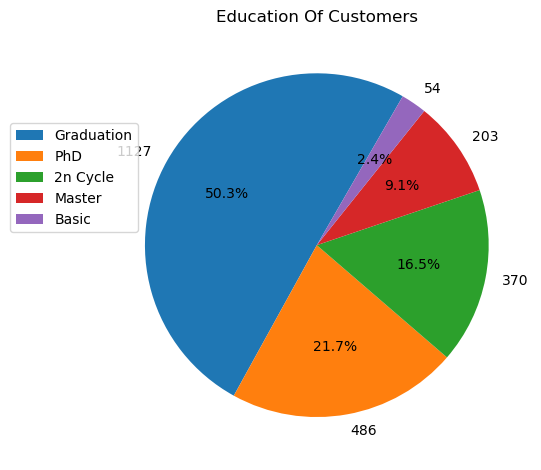

In [25]:
labels = df_data['Education'].dropna().unique()
actual_values = df_data['Education'].value_counts(dropna=True)
plt.pie(df_data['Education'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Education Of Customers', fontsize=12)
plt.legend(labels, bbox_to_anchor = (0.1, 0.8))
plt.tight_layout()
plt.show()

In [26]:
# Education Insights
# 1.A significant portion of the customer base is well-educated, with more than half having completed graduation.
# 2. There is a substantial number of customers with advanced degrees (PhD and Master), 
#    indicating a potentially high-income customer base.


In [27]:
df_data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [28]:
# Replacing 'Alone', 'YOLO', and 'Absurd' with 'Other' in the 'Marital_Status' column as these are few.

df_data['Marital_Status'] = df_data['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'], 'Other')

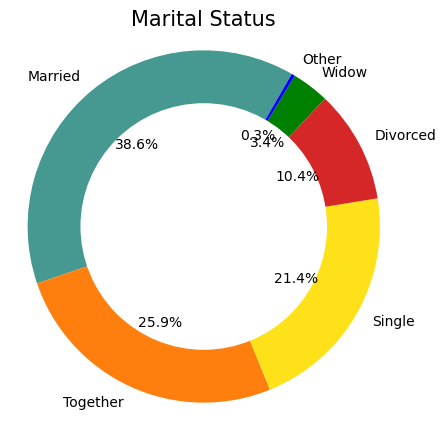

In [29]:
data_marital =df_data['Marital_Status'].value_counts()

custom_colors = ['#469990', '#ff7f0e', '#ffe119', '#d62728','green','blue']

plt.figure(figsize=(5, 5))
plt.pie(data_marital, labels=data_marital.index, autopct='%1.1f%%', startangle=60, colors=custom_colors)
plt.title('Marital Status',fontsize =15)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Draw a white circle to create the donut shape
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [30]:
# Marital Status
#1.A large segment of the customer base is married or living together (64.5%), which might influence product choices, particularly those suited for households.
#2. A notable portion of customers are single (21.4%), which could be a target for different marketing strategies compared to those for families.
#3. Divorced (10.4%) and widowed (3.0%) customers represent smaller segments that may have unique needs and preferences.


In [31]:
df_data["Kidhome"].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

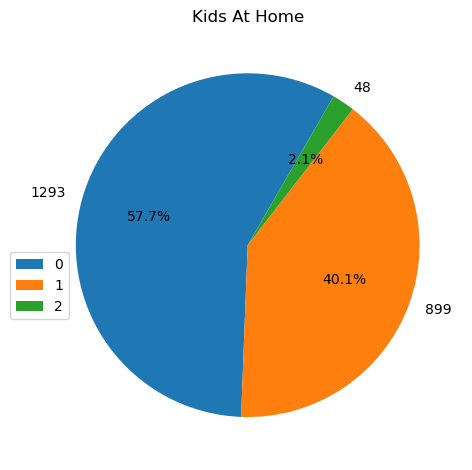

In [32]:
labels = df_data['Kidhome'].dropna().unique()
actual_values = df_data['Kidhome'].value_counts(dropna=True)
plt.pie(df_data['Kidhome'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Kids At Home', fontsize=12)
plt.legend(labels, bbox_to_anchor = (0.1, 0.5))
plt.tight_layout()
plt.show()

In [33]:
df_data["Teenhome"].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

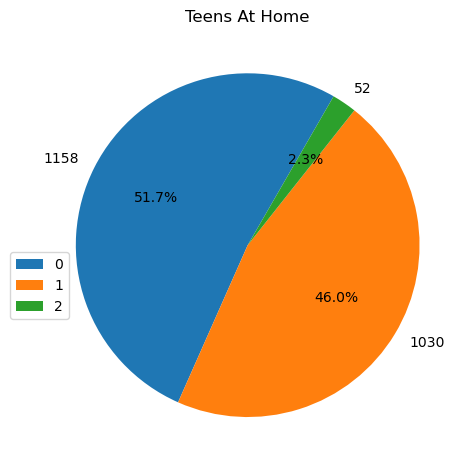

In [34]:
labels = df_data['Teenhome'].dropna().unique()
actual_values = df_data['Teenhome'].value_counts(dropna=True)
plt.pie(df_data['Teenhome'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Teens At Home', fontsize=12)
plt.legend(labels, bbox_to_anchor = (0.1, 0.5))
plt.tight_layout()
plt.show()

In [35]:
# Insights on Kids and Teen at home
# 1. Most customers do not have kids (57.7%) or teens (51.7%) at home, which might affect purchasing behavior and 
#    product preferences.
#2.  A large portion has either one kid (40.1%) or one teen (46.0%), which could be targeted with family-oriented products
#    or services.


In [36]:
df_data["AcceptedCmp1"].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

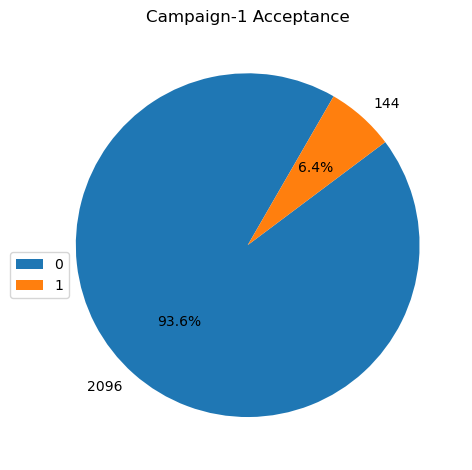

In [37]:
labels = df_data['AcceptedCmp1'].dropna().unique()
actual_values = df_data['AcceptedCmp1'].value_counts(dropna=True)
plt.pie(df_data['AcceptedCmp1'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Campaign-1 Acceptance', fontsize=12)
plt.legend(labels, bbox_to_anchor = (0.1, 0.5))
plt.tight_layout()
plt.show()

In [38]:
df_data["AcceptedCmp2"].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

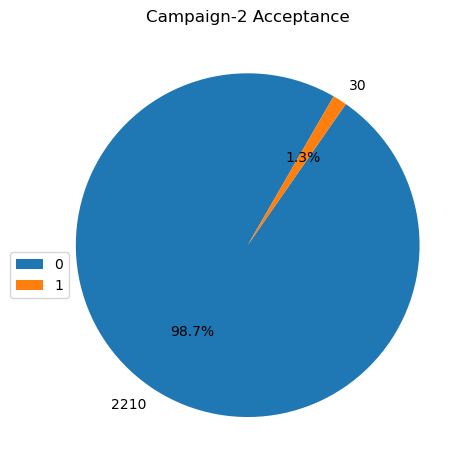

In [39]:
labels = df_data['AcceptedCmp2'].dropna().unique()
actual_values = df_data['AcceptedCmp2'].value_counts(dropna=True)
plt.pie(df_data['AcceptedCmp2'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Campaign-2 Acceptance', fontsize=12)
plt.legend(labels, bbox_to_anchor = (0.1, 0.5))
plt.tight_layout()
plt.show()

In [40]:
df_data["AcceptedCmp3"].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

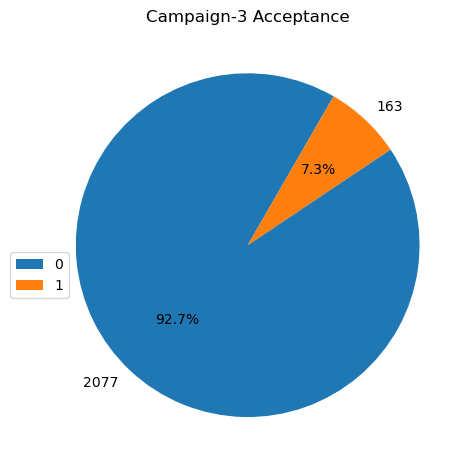

In [41]:
labels = df_data['AcceptedCmp3'].dropna().unique()
actual_values = df_data['AcceptedCmp3'].value_counts(dropna=True)
plt.pie(df_data['AcceptedCmp3'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Campaign-3 Acceptance', fontsize=12)
plt.legend(labels, bbox_to_anchor = (0.1, 0.5))
plt.tight_layout()
plt.show()

In [42]:
df_data["AcceptedCmp4"].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

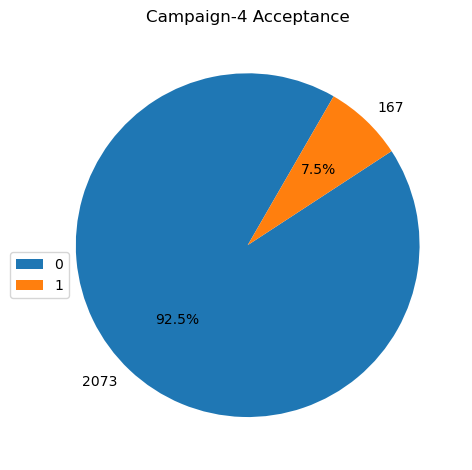

In [43]:
labels = df_data['AcceptedCmp4'].dropna().unique()
actual_values = df_data['AcceptedCmp4'].value_counts(dropna=True)
plt.pie(df_data['AcceptedCmp4'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Campaign-4 Acceptance', fontsize=12)
plt.legend(labels, bbox_to_anchor = (0.1, 0.5))
plt.tight_layout()
plt.show()

In [44]:
df_data["AcceptedCmp5"].value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

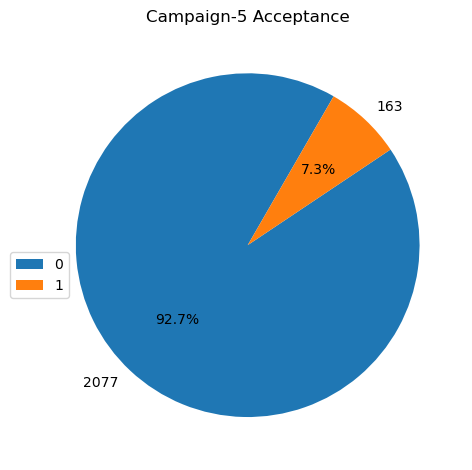

In [45]:
labels = df_data['AcceptedCmp5'].dropna().unique()
actual_values = df_data['AcceptedCmp5'].value_counts(dropna=True)
plt.pie(df_data['AcceptedCmp5'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Campaign-5 Acceptance', fontsize=12)
plt.legend(labels, bbox_to_anchor = (0.1, 0.5))
plt.tight_layout()
plt.show()

In [46]:
#Campaign Acceptance Insights:

# 1.The acceptance rates for all five campaigns are quite low, with Campaign 2 having the lowest acceptance rate at 1.3%.
# 2. Campaigns 3, 4, and 5 have slightly higher acceptance rates, around 7.3% to 7.5%, 
#    suggesting that these campaigns might have been slightly more appealing or better targeted.


In [47]:
df_data["Response"].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [48]:
df_data["Complain"].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

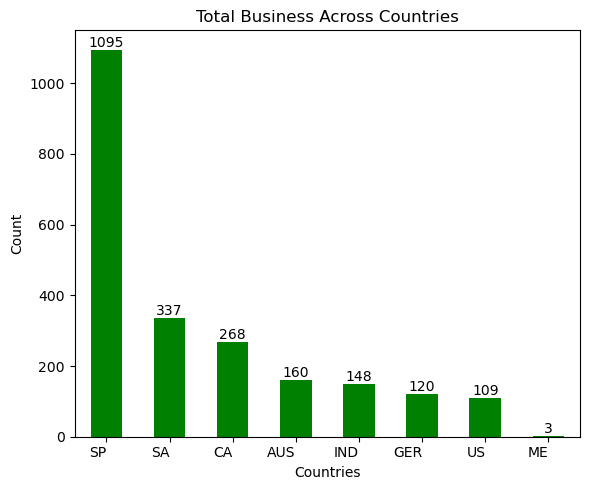

In [49]:
country_d = df_data['Country'].value_counts()

plt.figure(figsize=(6,5))
country_d.plot(kind='bar', color='g')
plt.title('Total Business Across Countries',fontsize =12)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')  # Rotate x labels for better readability

for i, count in enumerate(country_d):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [50]:
## Finding total offers accepted by each customer in all 5 campaigns

campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate total acceptance
df_data['Total_Offer_Acceptance'] = df_data[campaign_columns].sum(axis=1)

df_data['Total_Offer_Acceptance'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: Total_Offer_Acceptance, dtype: int64

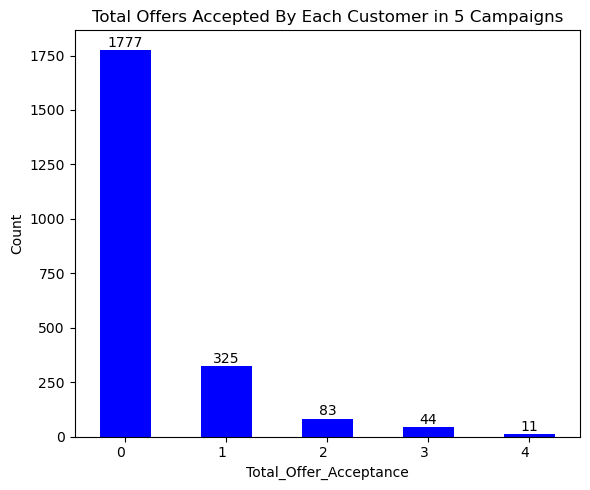

In [51]:
cam_accept = df_data['Total_Offer_Acceptance'].value_counts()

plt.figure(figsize=(6,5))
cam_accept.plot(kind='bar', color='b')
plt.title('Total Offers Accepted By Each Customer in 5 Campaigns',fontsize =12)
plt.xlabel('Total_Offer_Acceptance')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')  # Rotate x labels for better readability

for i, count in enumerate(cam_accept):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 1777 customer didnt accept any of offers,325 accepted 1 offer,83 customers accepted 2 offers & so on.

In [52]:
# Total Acceptance Insights
#1. Most customers (1,797) did not accept any offers from the campaigns.
#2. A smaller number (125) accepted one offer, and even fewer accepted more than one offer.
#3. Very few customers accepted up to four offers, showing a steep drop-off after the first offer acceptance.


In [53]:
##  Age calculation from Birth_Year

def calculate_age(birth_year):
    current_year = datetime.now().year
    age = current_year - birth_year
    return age
df_data['Age'] = df_data['Year_Birth'].apply(calculate_age)
df_data

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Total_Offer_Acceptance,Age
0,1826,0,189,104,379,111,189,218,1,4,...,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,54
1,1,0,464,5,64,7,0,37,1,7,...,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,1,63
2,10476,0,134,11,59,15,2,30,1,3,...,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,66
3,1386,0,10,0,1,0,0,0,1,1,...,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,57
4,5371,0,6,16,24,11,0,34,2,3,...,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,372,18,126,47,48,78,2,5,...,1976,PhD,Divorced,66476.0,0,1,3/7/13,US,0,48
2236,5263,99,5,10,13,3,8,16,1,1,...,1977,2n Cycle,Married,31056.0,1,0,1/22/13,SP,0,47
2237,22,99,185,2,88,15,5,14,2,6,...,1976,Graduation,Divorced,46310.0,1,0,12/3/12,SP,0,48
2238,528,99,267,38,701,149,165,63,1,5,...,1978,Graduation,Married,65819.0,0,0,11/29/12,IND,0,46


In [54]:
## Calculation of total amount spent by each customer in all products.

amount_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df_data['Total_Spent'] = df_data[amount_columns].sum(axis=1)

df_data

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Total_Offer_Acceptance,Age,Total_Spent
0,1826,0,189,104,379,111,189,218,1,4,...,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,54,1190
1,1,0,464,5,64,7,0,37,1,7,...,Graduation,Single,57091.0,0,0,6/15/14,CA,1,63,577
2,10476,0,134,11,59,15,2,30,1,3,...,Graduation,Married,67267.0,0,1,5/13/14,US,0,66,251
3,1386,0,10,0,1,0,0,0,1,1,...,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,57,11
4,5371,0,6,16,24,11,0,34,2,3,...,Graduation,Single,21474.0,1,0,4/8/14,SP,1,35,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,372,18,126,47,48,78,2,5,...,PhD,Divorced,66476.0,0,1,3/7/13,US,0,48,689
2236,5263,99,5,10,13,3,8,16,1,1,...,2n Cycle,Married,31056.0,1,0,1/22/13,SP,0,47,55
2237,22,99,185,2,88,15,5,14,2,6,...,Graduation,Divorced,46310.0,1,0,12/3/12,SP,0,48,309
2238,528,99,267,38,701,149,165,63,1,5,...,Graduation,Married,65819.0,0,0,11/29/12,IND,0,46,1383


In [55]:
df_data["Total_Spent"].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_Spent, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

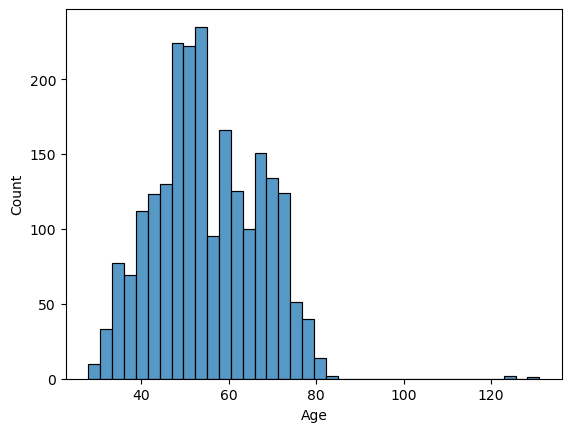

In [56]:
sns.histplot(x = df_data["Age"])

# Age distribution is bell curve,median of age is 54.

In [57]:
df_data["Age"].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

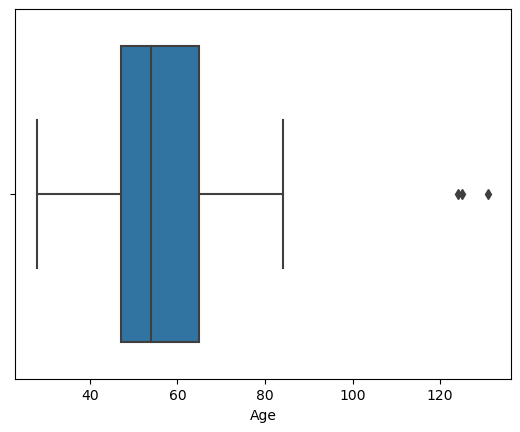

<Figure size 500x500 with 0 Axes>

In [58]:
sns.boxplot(x=df_data.Age)
plt.figure(figsize = [5,5])
plt.show()


In [59]:
bins = [20,30,45,60,80,100]  

# Define labels for the groups
group_labels = ['<30','30-40','46-60','60-80','>80']

# Create a new column 'Age_Group' based on the bins
df_data['Age_Group'] = pd.cut(df_data['Age'], bins=bins, labels=group_labels)

df_data

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Total_Offer_Acceptance,Age,Total_Spent,Age_Group
0,1826,0,189,104,379,111,189,218,1,4,...,Divorced,84835.0,0,0,6/16/14,SP,0,54,1190,46-60
1,1,0,464,5,64,7,0,37,1,7,...,Single,57091.0,0,0,6/15/14,CA,1,63,577,60-80
2,10476,0,134,11,59,15,2,30,1,3,...,Married,67267.0,0,1,5/13/14,US,0,66,251,60-80
3,1386,0,10,0,1,0,0,0,1,1,...,Together,32474.0,1,1,5/11/14,AUS,0,57,11,46-60
4,5371,0,6,16,24,11,0,34,2,3,...,Single,21474.0,1,0,4/8/14,SP,1,35,91,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,372,18,126,47,48,78,2,5,...,Divorced,66476.0,0,1,3/7/13,US,0,48,689,46-60
2236,5263,99,5,10,13,3,8,16,1,1,...,Married,31056.0,1,0,1/22/13,SP,0,47,55,46-60
2237,22,99,185,2,88,15,5,14,2,6,...,Divorced,46310.0,1,0,12/3/12,SP,0,48,309,46-60
2238,528,99,267,38,701,149,165,63,1,5,...,Married,65819.0,0,0,11/29/12,IND,0,46,1383,46-60


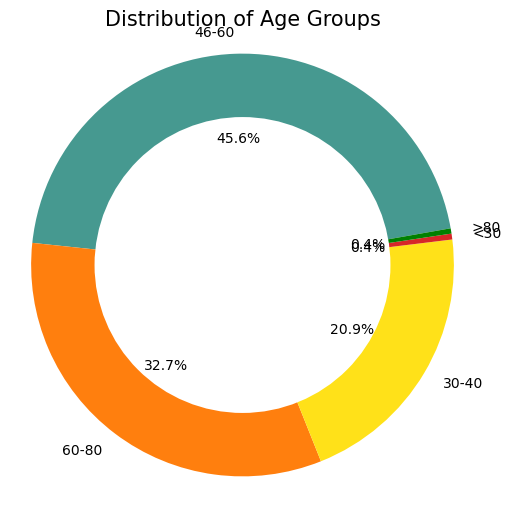

In [60]:
data_age =df_data['Age_Group'].value_counts()

custom_colors = ['#469990', '#ff7f0e', '#ffe119', '#d62728','green']

plt.figure(figsize=(6,6))
plt.pie(data_age, labels=data_age.index, autopct='%1.1f%%', startangle=10, colors=custom_colors)
plt.title('Distribution of Age Groups',fontsize =15)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Draw a white circle to create the donut shape
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [61]:
df_data['Age_Group'].value_counts()

46-60    1019
60-80     732
30-40     467
<30        10
>80         9
Name: Age_Group, dtype: int64

In [62]:
# Age Insights:
#The customer base is predominantly middle-aged (40-60), making up nearly half of the total customers.
#There are some older customers, but they represent a much smaller portion of the population.
#The presence of outliers in the older age range suggests the need to validate the data quality (e.g., the customer with an age of 120 might be an error).


<Axes: xlabel='Income', ylabel='Count'>

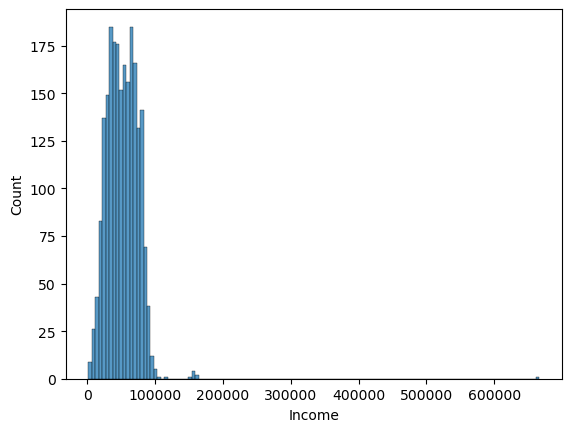

In [63]:
sns.histplot(x = df_data["Income"])

# Bell curve,with median income of 51000/-.

In [64]:
df_data["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

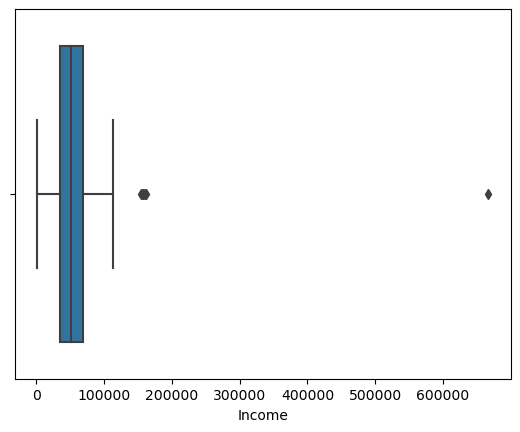

<Figure size 500x500 with 0 Axes>

In [65]:
sns.boxplot(x=df_data.Income)
plt.figure(figsize = [5,5])
plt.show()

# There are aprox 3 outliers observed in income (2 at approx 1.5lacs range and 1 at 6lacs range).

<Axes: xlabel='Recency', ylabel='Count'>

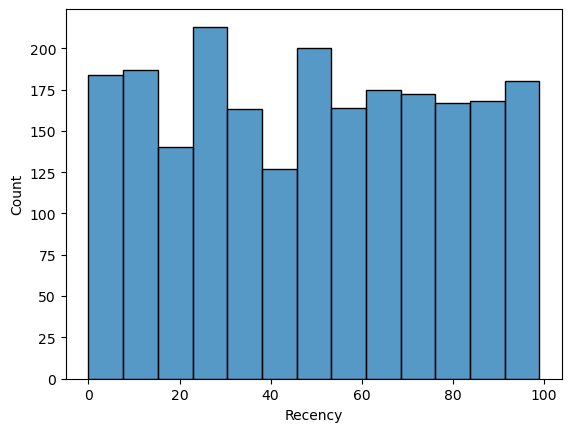

In [66]:
sns.histplot(x = df_data["Recency"])

In [67]:
# Recency Insights
# The uniform distribution of recency values suggests that purchases are spread out evenly over time. 
# There is no particular peak period, which implies that customer engagement is steady throughout the year. 
# Continuous engagement strategies could maintain this balance.

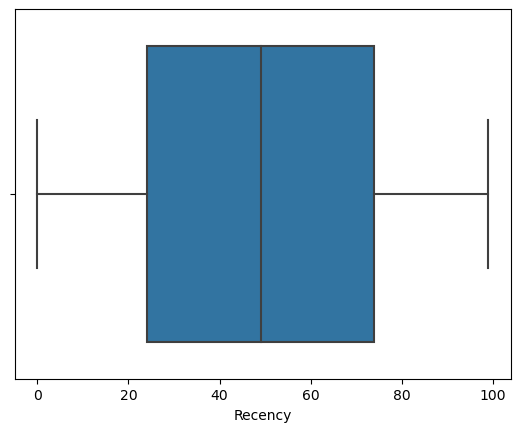

<Figure size 500x500 with 0 Axes>

In [68]:
sns.boxplot(x=df_data.Recency)
plt.figure(figsize = [5,5])
plt.show()

<Axes: xlabel='MntWines', ylabel='Count'>

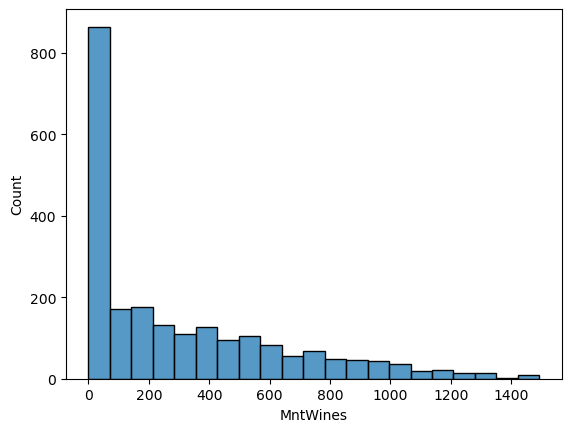

In [69]:
sns.histplot(x = df_data["MntWines"])
# Positively skewed with outliers above 1200.

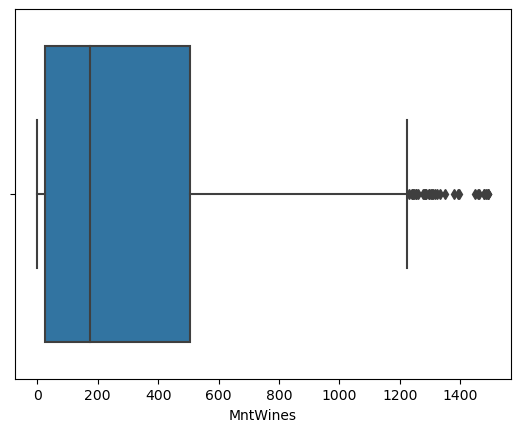

<Figure size 500x500 with 0 Axes>

In [70]:
sns.boxplot(x=df_data.MntWines)
plt.figure(figsize = [5,5])
plt.show()

In [71]:
df_data["MntWines"].describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

<Axes: xlabel='MntFruits', ylabel='Count'>

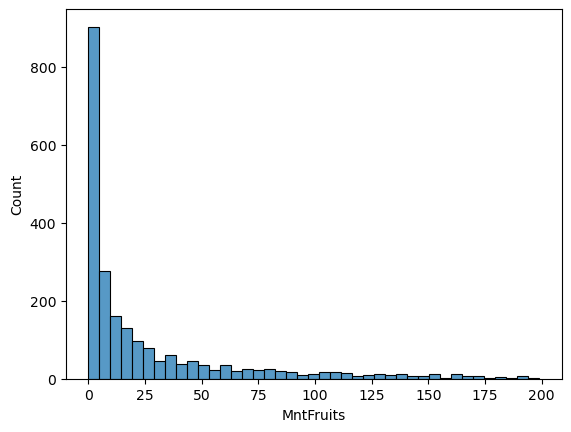

In [72]:
sns.histplot(x = df_data["MntFruits"])
# ps with more no. of customers have spent 5 dollars on fruits.

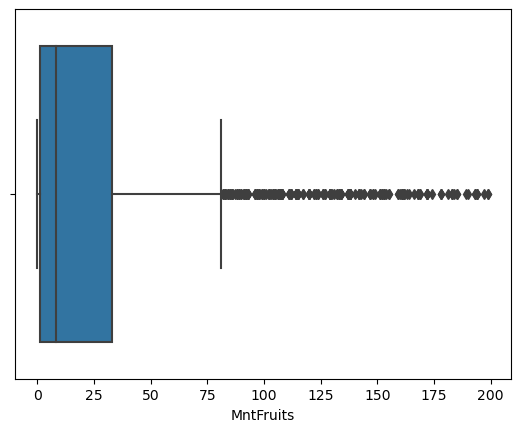

<Figure size 500x500 with 0 Axes>

In [73]:
sns.boxplot(x=df_data.MntFruits)
plt.figure(figsize = [5,5])
plt.show()
# Since there are many outliers so we can consider mean value to understand the distribution.

In [74]:
df_data["MntFruits"].describe()

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

In [75]:
df_data["MntMeatProducts"].describe()

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

<Axes: xlabel='MntMeatProducts', ylabel='Count'>

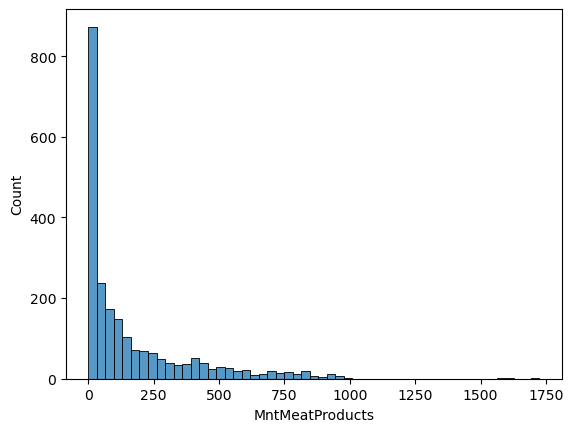

In [76]:
sns.histplot(x = df_data["MntMeatProducts"])

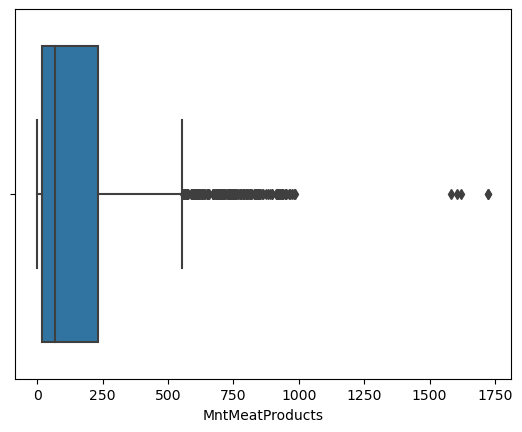

<Figure size 500x500 with 0 Axes>

In [77]:
sns.boxplot(x=df_data.MntMeatProducts)
plt.figure(figsize = [5,5])
plt.show()

# Since there are many outliers so we can consider mean value to understand the distribution

<Axes: xlabel='MntFishProducts', ylabel='Count'>

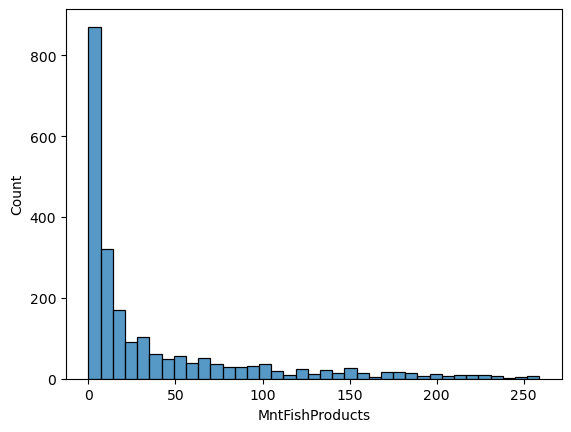

In [78]:
sns.histplot(x = df_data["MntFishProducts"])

In [79]:
df_data["MntFishProducts"].describe()

count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64

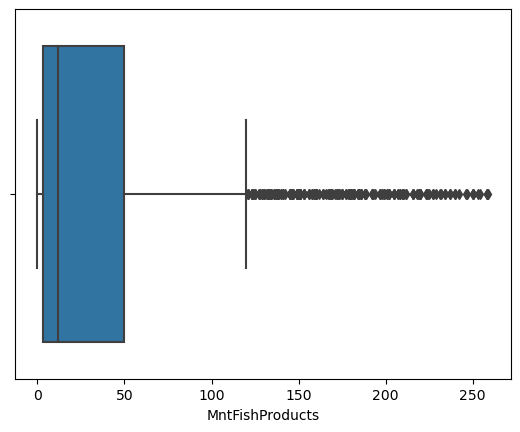

<Figure size 500x500 with 0 Axes>

In [80]:
sns.boxplot(x=df_data.MntFishProducts)
plt.figure(figsize = [5,5])
plt.show()

<Axes: xlabel='MntSweetProducts', ylabel='Count'>

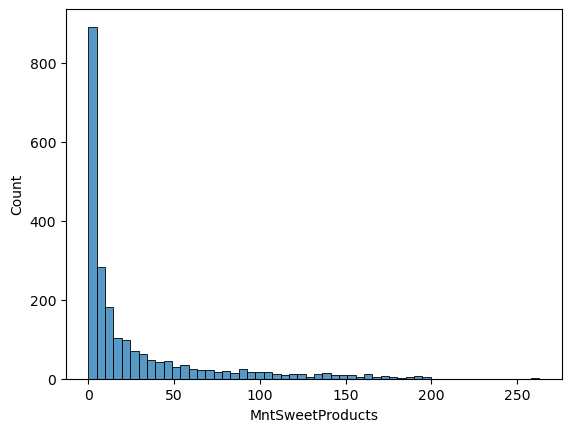

In [81]:
sns.histplot(x = df_data["MntSweetProducts"])

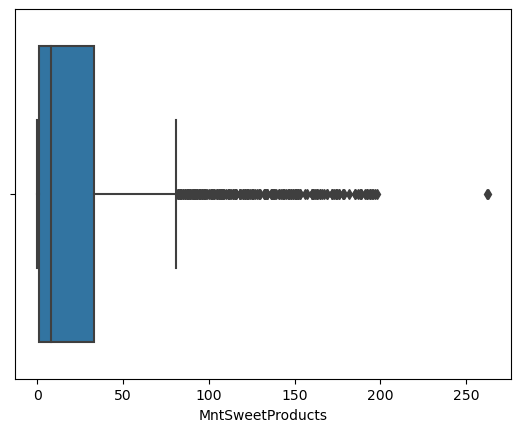

<Figure size 500x500 with 0 Axes>

In [82]:
sns.boxplot(x=df_data.MntSweetProducts)
plt.figure(figsize = [5,5])
plt.show()

In [83]:
df_data["MntSweetProducts"].describe()

count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: MntSweetProducts, dtype: float64

<Axes: xlabel='MntGoldProds', ylabel='Count'>

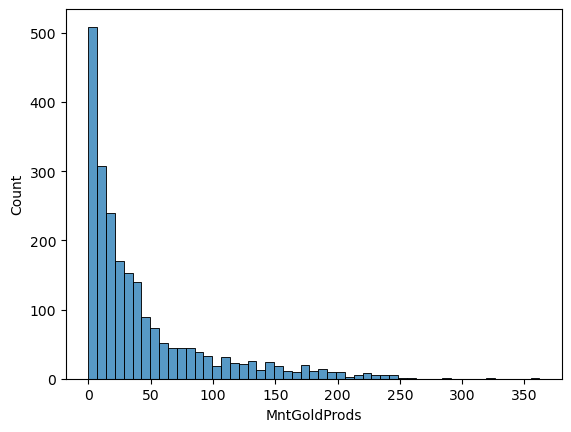

In [84]:
sns.histplot(x = df_data["MntGoldProds"])

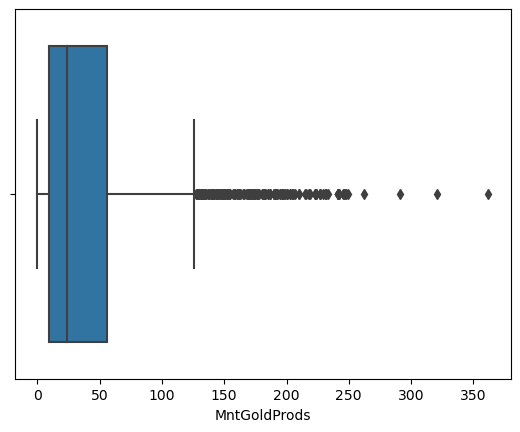

<Figure size 500x500 with 0 Axes>

In [85]:
sns.boxplot(x=df_data.MntGoldProds)
plt.figure(figsize = [5,5])
plt.show()

In [86]:
df_data["MntGoldProds"].describe()

count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       362.000000
Name: MntGoldProds, dtype: float64

In [87]:
# Spending Insights

#1. Low Spending on Fruits and Fish: Most customers spend very little on fruits and fish products, 
#   suggesting that these categories might not be as popular or could have lower margins.
#2. Higher Spending on Meat and Wine: Meat products and wines have higher spending distributions, 
#   indicating these are more popular categories. Special promotions or premium product offerings in these categories could be beneficial.
#3. Outliers: There are significant outliers in all categories, with some customers spending much more than the average.
#   Identifying and targeting these high spenders with personalized offers could increase revenue.


<Axes: xlabel='NumDealsPurchases', ylabel='Count'>

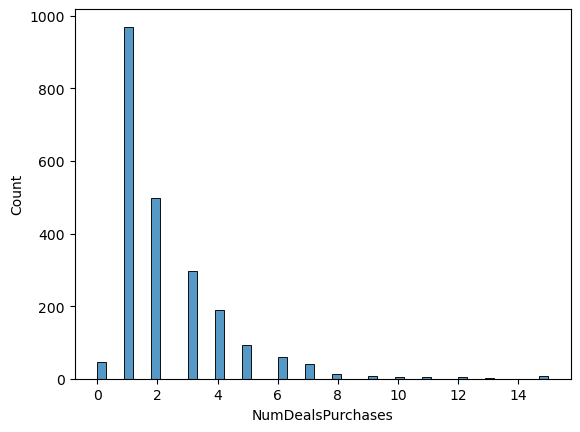

In [88]:
sns.histplot(x = df_data["NumDealsPurchases"])

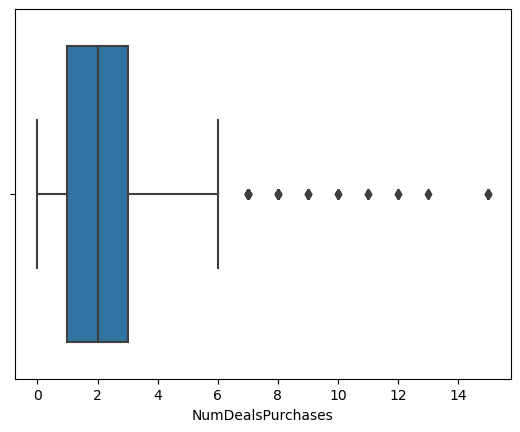

<Figure size 500x500 with 0 Axes>

In [89]:
sns.boxplot(x=df_data.NumDealsPurchases)
plt.figure(figsize = [5,5])
plt.show()

<Axes: xlabel='NumWebPurchases', ylabel='Count'>

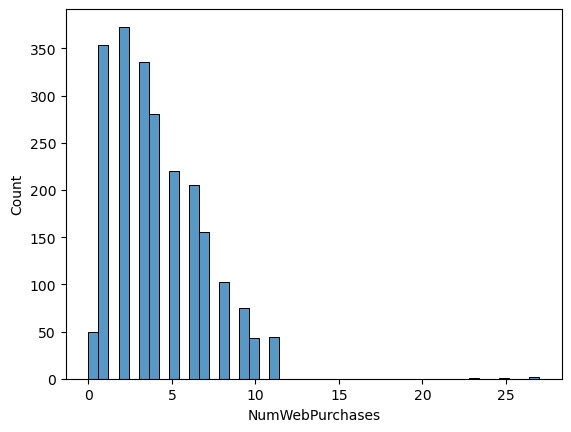

In [90]:
sns.histplot(x = df_data["NumWebPurchases"])

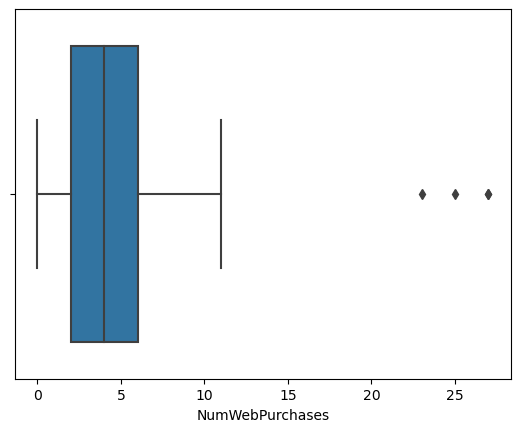

<Figure size 500x500 with 0 Axes>

In [91]:
sns.boxplot(x=df_data.NumWebPurchases)
plt.figure(figsize = [5,5])
plt.show()

<Axes: xlabel='NumStorePurchases', ylabel='Count'>

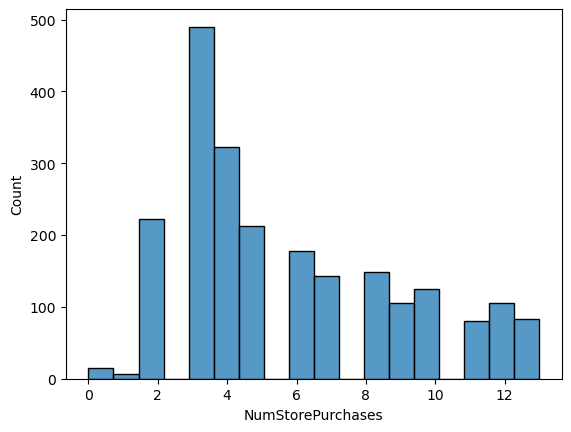

In [92]:
sns.histplot(x = df_data["NumStorePurchases"])

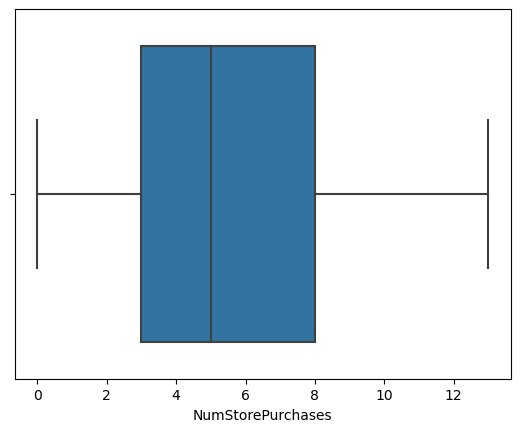

<Figure size 500x500 with 0 Axes>

In [93]:
sns.boxplot(x=df_data.NumStorePurchases)
plt.figure(figsize = [5,5])
plt.show()

<Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>

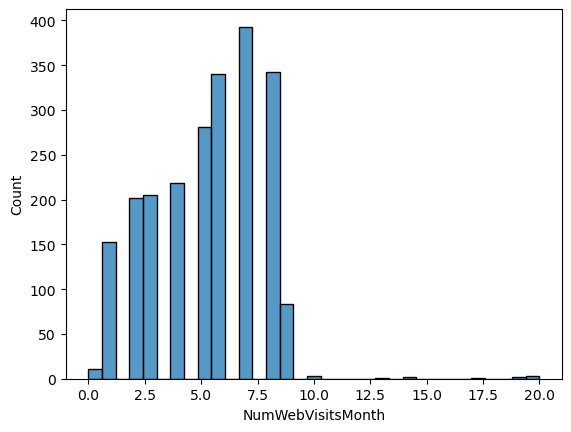

In [94]:
sns.histplot(x = df_data["NumWebVisitsMonth"])

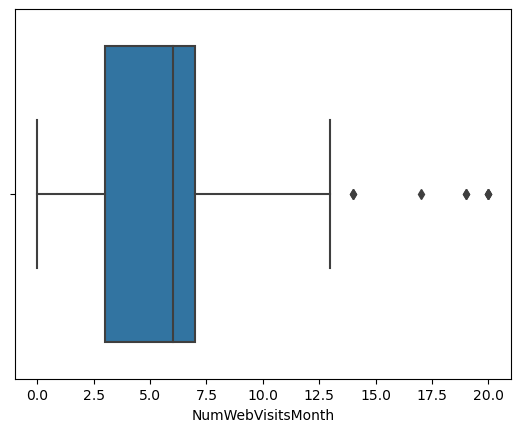

<Figure size 500x500 with 0 Axes>

In [95]:
sns.boxplot(x=df_data.NumWebVisitsMonth)
plt.figure(figsize = [5,5])
plt.show()

<Axes: xlabel='Total_Spent', ylabel='Count'>

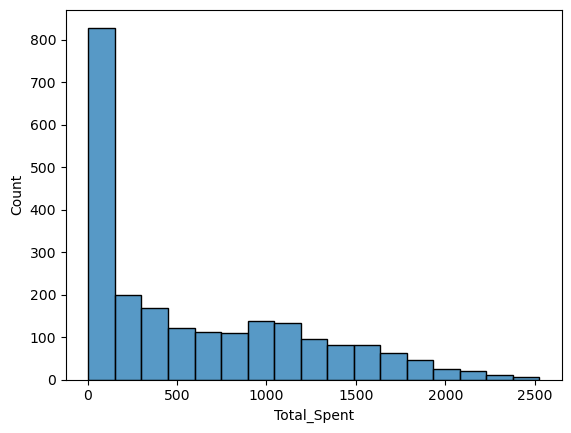

In [96]:
sns.histplot(x = df_data["Total_Spent"])

In [97]:
df_data["Total_Spent"].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_Spent, dtype: float64

# Missing Value Imputation

In [98]:
# Income has 24 missing values(1.07%)
df_data["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [99]:
df_data['Income'] =df_data['Income'].fillna(df_data['Income'].median())

In [100]:
bins = [0, 30000, 55000, 80000, np.inf] 

# Define labels for the income groups
income_labels = ['<30k', '31-55k', '56-80k','>80k']

# Create a new column 'Income_Group' based on the bins
df_data['Income_Group'] = pd.cut(df_data['Income'], bins=bins, labels=income_labels, right=False)
df_data

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Income,Kidhome,Teenhome,Dt_Customer,Country,Total_Offer_Acceptance,Age,Total_Spent,Age_Group,Income_Group
0,1826,0,189,104,379,111,189,218,1,4,...,84835.0,0,0,6/16/14,SP,0,54,1190,46-60,>80k
1,1,0,464,5,64,7,0,37,1,7,...,57091.0,0,0,6/15/14,CA,1,63,577,60-80,56-80k
2,10476,0,134,11,59,15,2,30,1,3,...,67267.0,0,1,5/13/14,US,0,66,251,60-80,56-80k
3,1386,0,10,0,1,0,0,0,1,1,...,32474.0,1,1,5/11/14,AUS,0,57,11,46-60,31-55k
4,5371,0,6,16,24,11,0,34,2,3,...,21474.0,1,0,4/8/14,SP,1,35,91,30-40,<30k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,372,18,126,47,48,78,2,5,...,66476.0,0,1,3/7/13,US,0,48,689,46-60,56-80k
2236,5263,99,5,10,13,3,8,16,1,1,...,31056.0,1,0,1/22/13,SP,0,47,55,46-60,31-55k
2237,22,99,185,2,88,15,5,14,2,6,...,46310.0,1,0,12/3/12,SP,0,48,309,46-60,31-55k
2238,528,99,267,38,701,149,165,63,1,5,...,65819.0,0,0,11/29/12,IND,0,46,1383,46-60,56-80k


In [101]:
df_data['Income_Group'].value_counts()

31-55k    873
56-80k    780
<30k      370
>80k      217
Name: Income_Group, dtype: int64

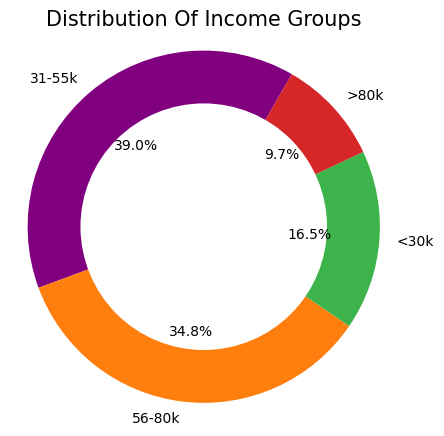

In [102]:
data_income =df_data['Income_Group'].value_counts()

custom_colors = ['#800080', '#ff7f0e', '#3cb44b', '#d62728']

plt.figure(figsize=(5,5))
plt.pie(data_income, labels=data_income.index, autopct='%1.1f%%', startangle=60, colors=custom_colors)
plt.title('Distribution Of Income Groups',fontsize =15)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) 
plt.axis('equal')  
plt.show()

In [103]:
# Income Insights:

#Majority of customers fall into the lower to middle-income brackets, with nearly three-quarters earning between 30,000 and 80,000.
#There are a few high-income customers, but they are outliers.
#The right-skewness indicates that a small number of customers have significantly higher incomes,
# which could impact marketing and sales strategies.

# Outlier Handling - Age

In [104]:
Age_above_100 = df_data[df_data['Age'] > 100].shape[0]
total_count = df_data.shape[0]
percentage_age_100 = (Age_above_100 / total_count) * 100
percentage_age_100

0.13392857142857142

In [105]:
# Removing outlier points 
df_data = df_data[~(df_data['Age'] > 100)]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\143954873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Dt_Customer'] = pd.to_datetime(df_data['Dt_Customer'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\143954873.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Month'] = df_data['Dt_Customer'].dt.month
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\143954873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

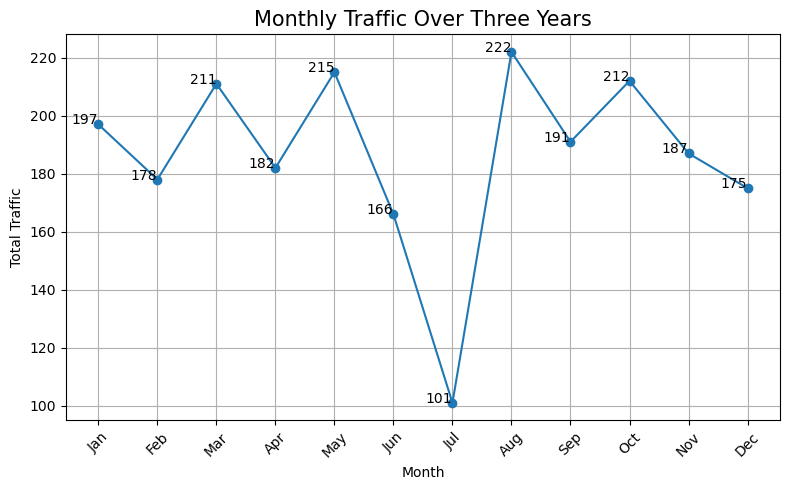

In [106]:
# Monthly Traffic analysis

df_data['Dt_Customer'] = pd.to_datetime(df_data['Dt_Customer'])

# Extract month and year from the date column
df_data['Month'] = df_data['Dt_Customer'].dt.month
df_data['Year'] = df_data['Dt_Customer'].dt.year

# Group by month and calculate the total enrollments
monthly_traffic = df_data.groupby('Month')['Year'].count()

# Plotting
plt.figure(figsize=(8,5))
monthly_traffic.plot(marker='o', linestyle='-')
plt.title('Monthly Traffic Over Three Years', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Total Traffic')
plt.grid(True)

# Annotate points with total traffic
for i, count in enumerate(monthly_traffic.values):
    plt.text(monthly_traffic.index[i], count, str(count), ha='right')

# Customize x-axis ticks to show month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), months, rotation=45)    
plt.tight_layout()
plt.show()

In [107]:
# Monthly traffic insights:

# March, May, August, October: These months show higher traffic, indicating favorable periods for activities 
#  that depend on higher engagement.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\2191357268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Dt_Customer'] = pd.to_datetime(df_data['Dt_Customer'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\2191357268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Year'] = df_data['Dt_Customer'].dt.year.astype(int)  # Convert to integer to remove decimals


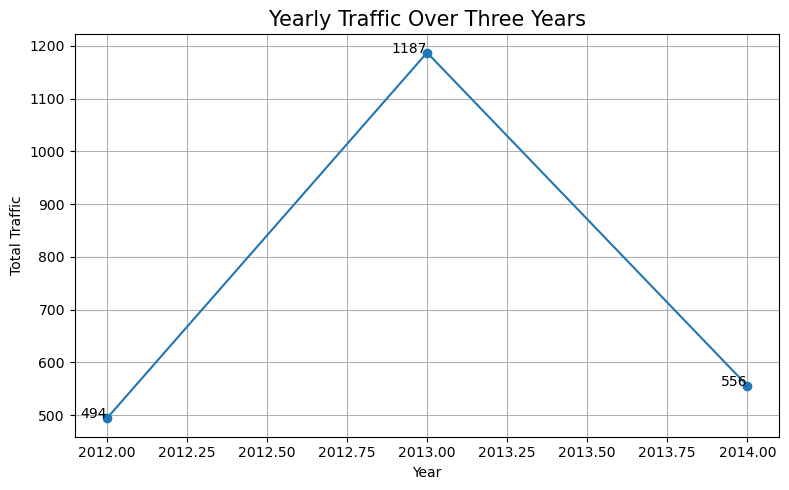

In [108]:
# Yearly Enrollments

df_data['Dt_Customer'] = pd.to_datetime(df_data['Dt_Customer'])

# Extract year from the date column
df_data['Year'] = df_data['Dt_Customer'].dt.year.astype(int)  # Convert to integer to remove decimals

# Group by year and calculate the total enrollments for each year
yearly_traffic = df_data.groupby('Year').size()

# Plotting
plt.figure(figsize=(8, 5))
yearly_traffic.plot(marker='o', linestyle='-')
plt.title('Yearly Traffic Over Three Years', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Total Traffic')
plt.grid(True)

# Annotate points with total traffic
for year, count in yearly_traffic.items():
    plt.text(year, count, str(count), ha='right')

plt.tight_layout()
plt.show()

In [109]:
#Yearly Traffic analysis

#   2012 to 2013: There is a substantial increase in traffic, more than doubling. 
#   This suggests a period of rapid growth and successful engagement with the audience.
#   2013 to 2014: There is a sharp decline in traffic, almost back to the 2012 level. 
#   This indicates that the growth seen in 2013 was not sustained into 2014, and there was a significant drop-off.

# Possible reasons of decline : It might be beneficial to analyze what changed between 2013 and 2014 to address the decline,
#  such as changes in strategy, market conditions, or customer preferences.

# Task 1- Point 3 :

In [110]:
#Doing univariates for continuous variables (compute: percentage of missing values, 
#percentage of terms which are zero, mean, 25th, 50th, 75th, 90th and 95th percentile, min and max)

In [111]:
continuous_vars = ['Age', 'Income', 'Recency', 'MntWines', 'MntFruits', 
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


In [112]:
def continuous_var_stats(df_data, vars):
    stats = {}
    for var in vars:
        stats[var] = {
            'missing_percentage': df_data[var].isna().mean() * 100,
            'zero_percentage': (df_data[var] == 0).mean() * 100,
            'mean': df_data[var].mean(),
            '25th_percentile': df_data[var].quantile(0.25),
            '50th_percentile': df_data[var].median(),
            '75th_percentile': df_data[var].quantile(0.75),
            '90th_percentile': df_data[var].quantile(0.90),
            '95th_percentile': df_data[var].quantile(0.95),
            'min': df_data[var].min(),
            'max': df_data[var].max()
        }
    return pd.DataFrame(stats).T

# Calculate statistics
continuous_stats = continuous_var_stats(df_data, continuous_vars)
print(continuous_stats)

                  missing_percentage  zero_percentage          mean  \
Age                              0.0         0.000000     55.098346   
Income                           0.0         0.000000  52227.407689   
Recency                          0.0         1.251676     49.104604   
MntWines                         0.0         0.581135    303.995530   
MntFruits                        0.0        17.836388     26.270451   
MntMeatProducts                  0.0         0.044703    166.916853   
MntFishProducts                  0.0        17.165847     37.523022   
MntSweetProducts                 0.0        18.685740     27.068842   
MntGoldProds                     0.0         2.726866     43.968708   

                  25th_percentile  50th_percentile  75th_percentile  \
Age                          47.0             54.0             65.0   
Income                    35523.0          51381.5          68281.0   
Recency                      24.0             49.0             74.0   
MntWi

In [113]:
categorical_vars = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Country', 
                    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                    'Response']

In [114]:
def categorical_var_stats(df_data, vars):
    stats = {}
    for var in vars:
        stats[var] = {
            'missing_percentage': df_data[var].isna().mean() * 100,
            'unique_values': df_data[var].nunique()
        }
    return pd.DataFrame(stats).T

# Calculate statistics
categorical_stats = categorical_var_stats(df_data, categorical_vars)
print(categorical_stats)

                missing_percentage  unique_values
Education                      0.0            5.0
Marital_Status                 0.0            6.0
Kidhome                        0.0            3.0
Teenhome                       0.0            3.0
Country                        0.0            8.0
AcceptedCmp1                   0.0            2.0
AcceptedCmp2                   0.0            2.0
AcceptedCmp3                   0.0            2.0
AcceptedCmp4                   0.0            2.0
Response                       0.0            2.0


# Bivariate Analysis

<Axes: xlabel='Income', ylabel='Age'>

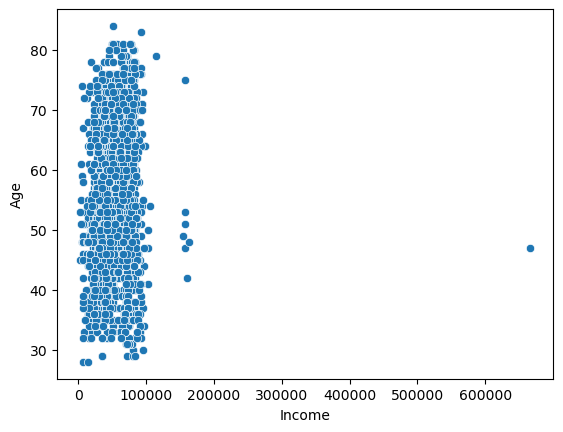

In [115]:
sns.scatterplot(df_data,x='Income',y ='Age')

<Axes: xlabel='Income', ylabel='Total_Spent'>

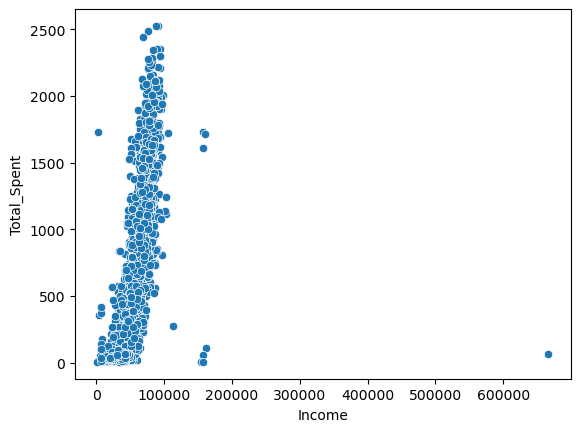

In [116]:
sns.scatterplot(df_data,x='Income',y ='Total_Spent')

In [117]:
plt.figure(figsize=(10,10))
#sns.pairplot(df_data)
#plt.show
#plt.savefig("D:\\")

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [118]:
cor = (df_data[["Age","Income","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases",
          "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","Total_Spent"]]).corr()
cor

,Age,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spent
Age,1.000000,0.162346,0.019670,0.163035,0.013751,0.030927,0.042519,0.019571,0.057599,0.067999,0.153973,0.125439,0.139465,-0.117570,0.113865
Income,0.162346,1.000000,-0.003205,0.576731,0.428191,0.577524,0.437214,0.435918,0.321082,-0.082089,0.380847,0.586750,0.527346,-0.549429,0.664707
Recency,0.019670,-0.003205,1.000000,0.016668,-0.003592,0.023705,0.001532,0.023045,0.017412,-0.000987,-0.010616,0.025449,0.001117,-0.021959,0.021199
MntWines,0.163035,0.576731,0.016668,1.000000,0.388518,0.561993,0.399073,0.385992,0.386376,0.010829,0.542177,0.634784,0.642433,-0.320337,0.891734
MntFruits,0.013751,0.428191,-0.003592,0.388518,1.000000,0.542057,0.594438,0.567054,0.390042,-0.131886,0.297024,0.487307,0.463168,-0.417427,0.613122
MntMeatProducts,0.030927,0.577524,0.023705,0.561993,0.542057,1.000000,0.567880,0.523418,0.348845,-0.122465,0.293579,0.723519,0.480110,-0.539203,0.842655
MntFishProducts,0.042519,0.437214,0.001532,0.399073,0.594438,0.567880,1.000000,0.579553,0.422103,-0.139440,0.293489,0.534033,0.460099,-0.445760,0.642395
MntSweetProducts,0.019571,0.435918,0.023045,0.385992,0.567054,0.523418,0.579553,1.000000,0.369193,-0.120278,0.348304,0.490497,0.448801,-0.423249,0.602701
MntGoldProds,0.057599,0.321082,0.017412,0.386376,0.390042,0.348845,0.422103,0.369193,1.000000,0.049942,0.422731,0.436997,0.383264,-0.249093,0.522762
NumDealsPurchases,0.067999,-0.082089,-0.000987,0.010829,-0.131886,-0.122465,-0.139440,-0.120278,0.049942,1.000000,0.233772,-0.008728,0.068062,0.347261,-0.065158


<Axes: >

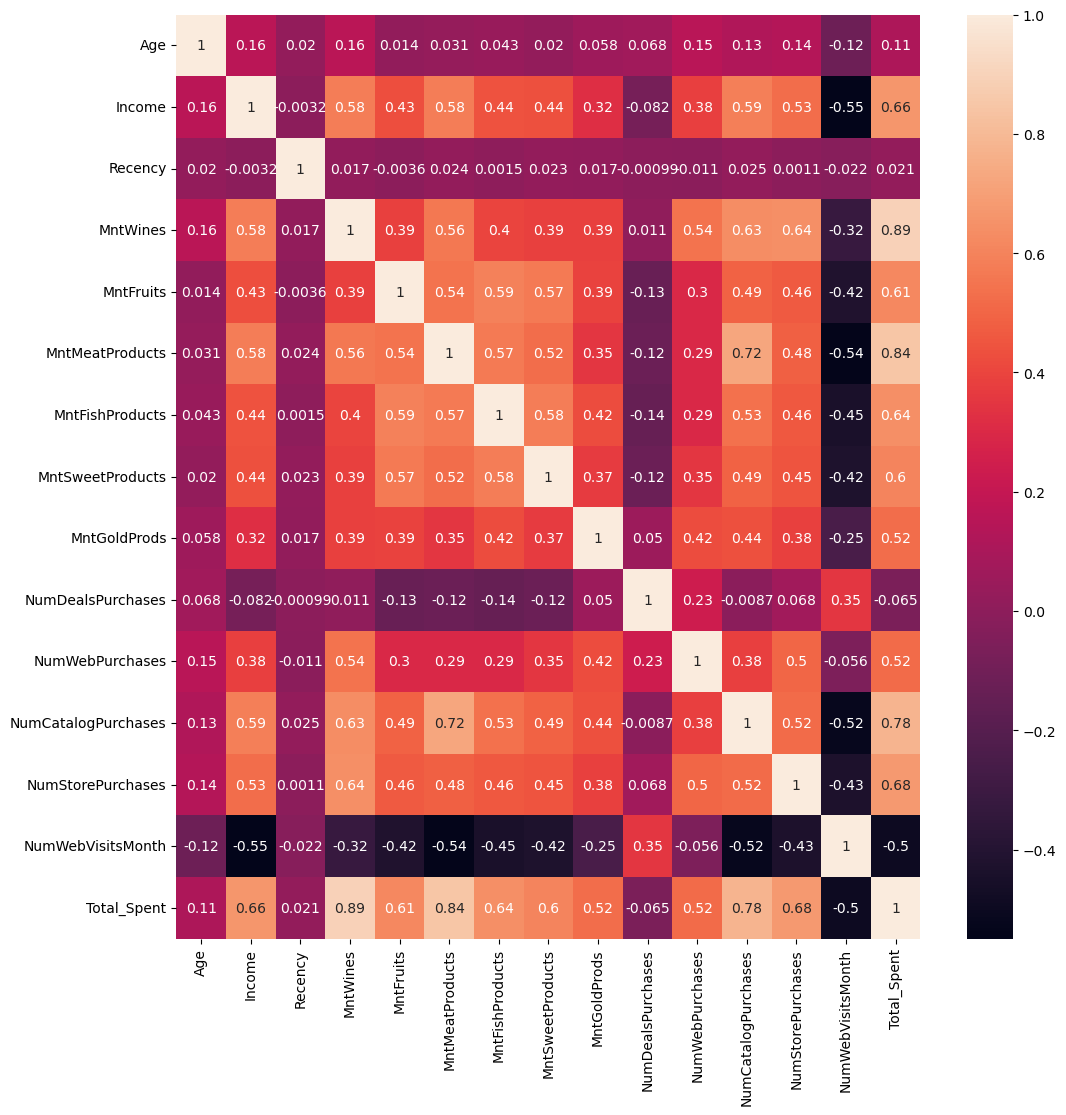

In [119]:
plt.figure(figsize= (12,12))
sns.heatmap(cor,annot =True)

In [120]:
# Recency doesnt have any corelation with other variables.
# income has almost 50% and more corelation with target products .
#Total spent has high corelation with wines,meat,cataloug purchase.Medium corre with income,fruits, fish,sweet.  
# As total spent increases physical visit increases.

In [121]:
df_data.groupby('Country')['Income'].mean()

Country
AUS    51769.934375
CA     53038.160448
GER    52898.775000
IND    49116.697279
ME     57680.333333
SA     54814.889881
SP     51535.021938
US     53184.669725
Name: Income, dtype: float64

<Axes: xlabel='Country', ylabel='Income'>

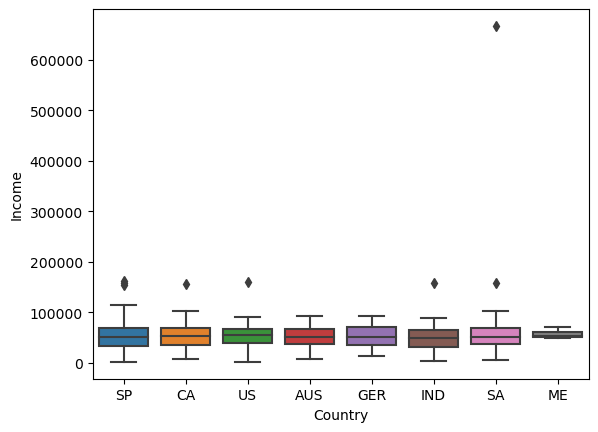

In [122]:
sns.boxplot(df_data,y="Income",x="Country")

In [123]:
df_data.groupby('Country')['Total_Spent'].mean()

Country
AUS     561.018750
CA      628.850746
GER     624.275000
IND     540.272109
ME     1040.666667
SA      628.122024
SP      603.626143
US      622.770642
Name: Total_Spent, dtype: float64

<Axes: xlabel='Country', ylabel='Total_Spent'>

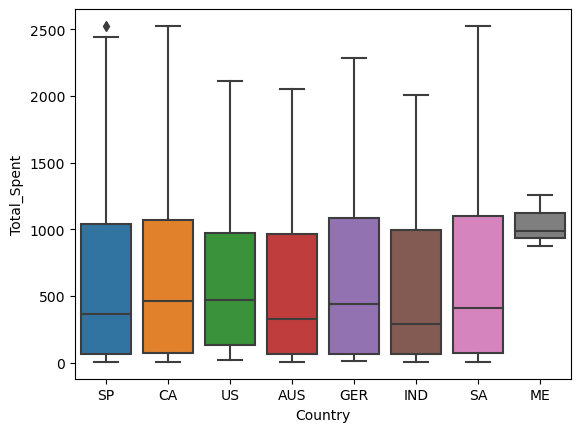

In [124]:
sns.boxplot(df_data,y="Total_Spent",x="Country")

<Axes: xlabel='Response', ylabel='Income'>

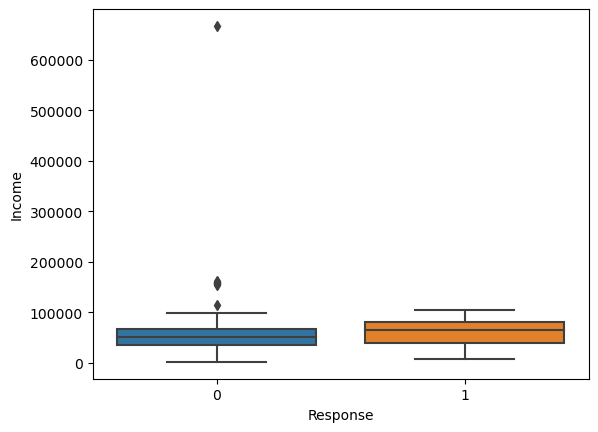

In [125]:
sns.boxplot(df_data,y="Income",x="Response")

<Axes: xlabel='Response', ylabel='Age'>

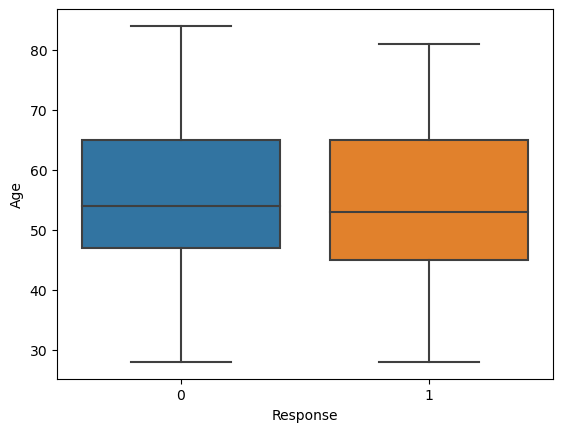

In [126]:
sns.boxplot(df_data,y="Age",x="Response")

<Axes: xlabel='Response', ylabel='Total_Spent'>

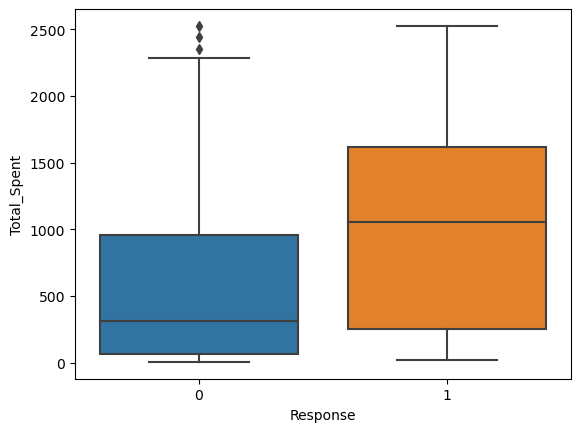

In [127]:
sns.boxplot(df_data,y="Total_Spent",x="Response")

In [128]:
df_data.columns

Index(['ID', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Response', 'Complain', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Country',
       'Total_Offer_Acceptance', 'Age', 'Total_Spent', 'Age_Group',
       'Income_Group', 'Month', 'Year'],
      dtype='object')

<Axes: xlabel='Response', ylabel='NumDealsPurchases'>

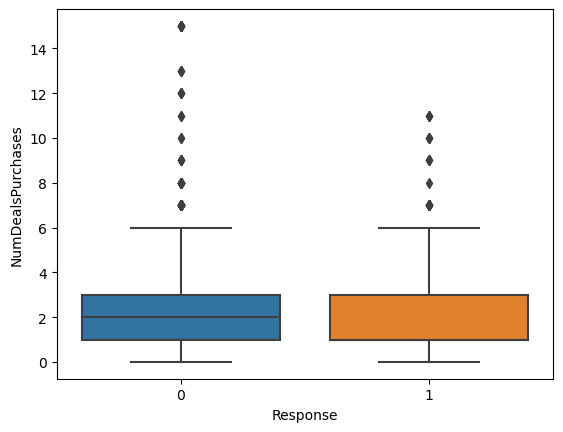

In [129]:
sns.boxplot(df_data,y="NumDealsPurchases",x="Response")

<Axes: xlabel='Response', ylabel='NumWebPurchases'>

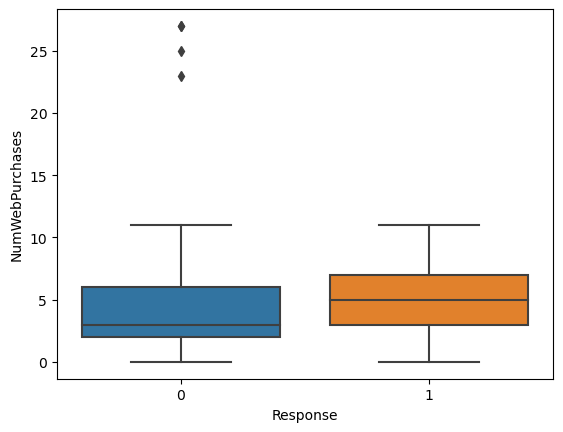

In [130]:
sns.boxplot(df_data,y="NumWebPurchases",x="Response")

<Axes: xlabel='Education', ylabel='Income'>

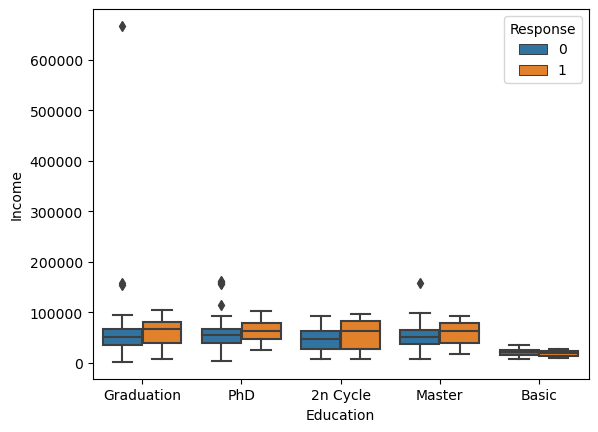

In [131]:
sns.boxplot(df_data,y="Income",x="Education",hue = 'Response')


<Axes: xlabel='Education', ylabel='Income'>

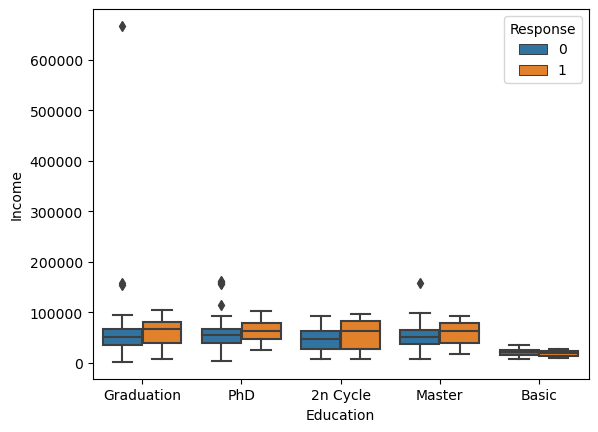

In [132]:
sns.boxplot(df_data,y="Income",x="Education",hue = 'Response')

In [133]:
df_data['Response_Flag'] = df_data['Response'] == 1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\3852904144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Response_Flag'] = df_data['Response'] == 1


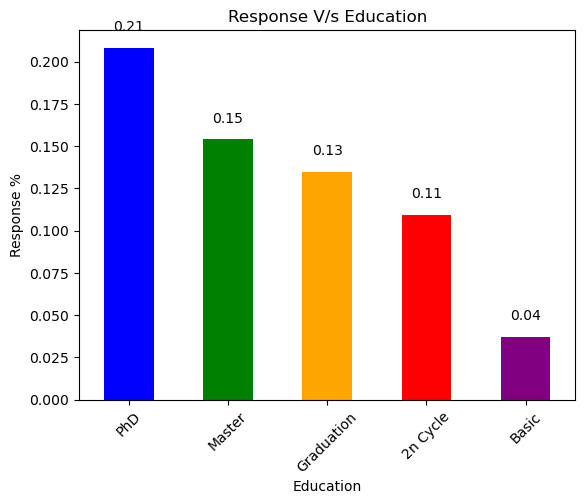

In [134]:
education_response = df_data.groupby('Education')['Response_Flag'].mean().sort_values(ascending=False)

education_response.plot.bar(color=['blue','green', 'orange', 'red', 'purple'])


plt.title('Response V/s Education')
plt.ylabel('Response %')
for i, v in enumerate(education_response):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

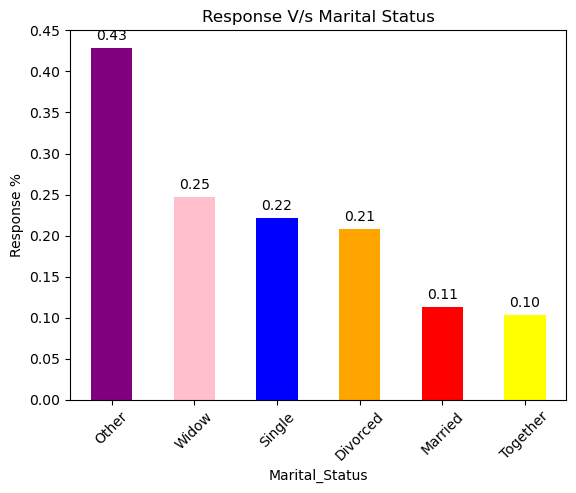

In [135]:
Marital_Response= df_data.groupby('Marital_Status')['Response_Flag'].mean().sort_values(ascending=False)

Marital_Response.plot.bar(color=['purple', 'pink', 'blue','orange','red','yellow'])

plt.title('Response V/s Marital Status')
plt.ylabel('Response %')

for i, v in enumerate(Marital_Response):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

In [136]:
df_data.columns

Index(['ID', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Response', 'Complain', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Country',
       'Total_Offer_Acceptance', 'Age', 'Total_Spent', 'Age_Group',
       'Income_Group', 'Month', 'Year', 'Response_Flag'],
      dtype='object')

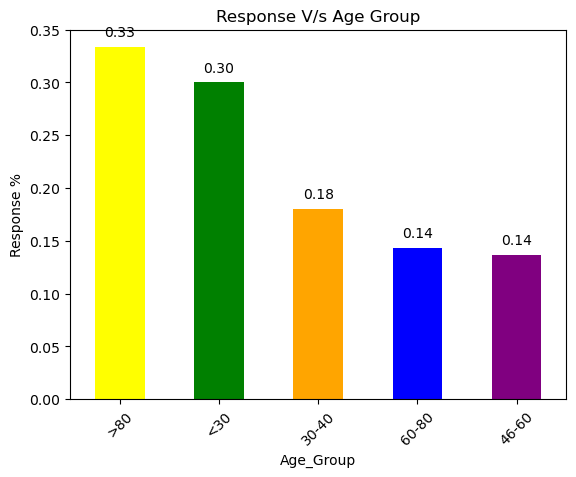

In [137]:
Age_Response= df_data.groupby('Age_Group')['Response_Flag'].mean().sort_values(ascending=False)

Age_Response.plot.bar(color=['yellow','green','orange', 'blue','purple','red'])

plt.title('Response V/s Age Group')
plt.ylabel('Response %')

for i, v in enumerate(Age_Response):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

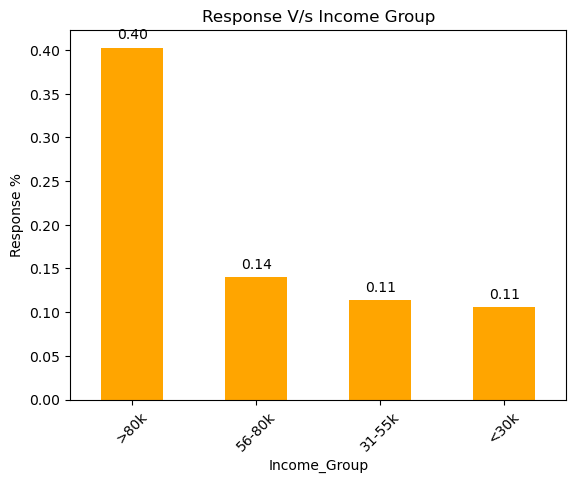

In [138]:
Income_Response= df_data.groupby('Income_Group')['Response_Flag'].mean().sort_values(ascending=False)

Income_Response.plot.bar(color=['orange'])

plt.title('Response V/s Income Group')
plt.ylabel('Response %')

for i, v in enumerate(Income_Response):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

In [139]:
# Income group v/s Response Inference

# The highest response rate of 0.40 (or 40%) is observed for the income group which corresponds to the ">80000".

# The data suggests that the response rate is significantly higher for individuals in the highest income group (>$80,000) compared to the other income groups.
# The response rates for the lower income groups are relatively similar, ranging from 11% to 14%.

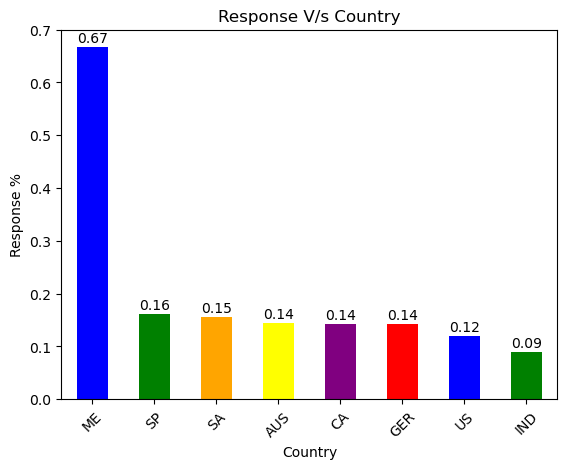

In [140]:
Country_Response= df_data.groupby('Country')['Response_Flag'].mean().sort_values(ascending=False)

Country_Response.plot.bar(color=['blue','green','orange','yellow' ,'purple','red'])

plt.title('Response V/s Country')
plt.ylabel('Response %')

for i, v in enumerate(Country_Response):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

In [141]:
# Country v/s response

#The highest response rate of 0.67 (or 67%) is observed for the country(ME) represented by the blue bar,
# The remaining countries have significantly lower response rates, ranging from around 0.15 (15%) .

# MultiVariate Analysis

<Axes: xlabel='Marital_Status', ylabel='Education'>

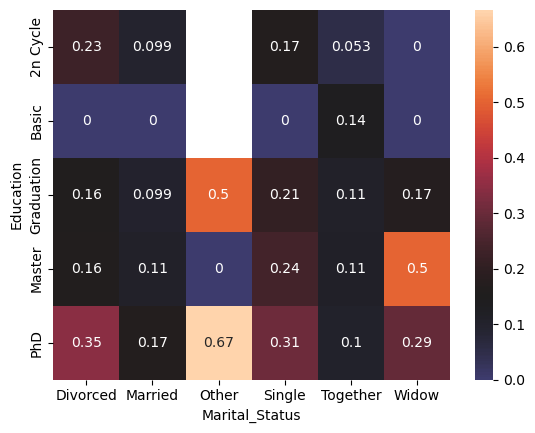

In [142]:
pt_marital=pd.pivot_table(data=df_data,index='Education',columns='Marital_Status',values='Response_Flag')
sns.heatmap(pt_marital,annot=True,center=df_data['Response'].mean())

In [143]:
# Campaign Response by Education and Marital Status

# 1.Individuals with a PhD who are categorized as "Other" in marital status show the highest acceptance ratio (0.67).
# 2. Widowed individuals with a Master’s degree and Individuals with 'Other' categorised marital status show a
#    moderate acceptance ratio (0.5)

<Axes: xlabel='Income_Group', ylabel='Age_Group'>

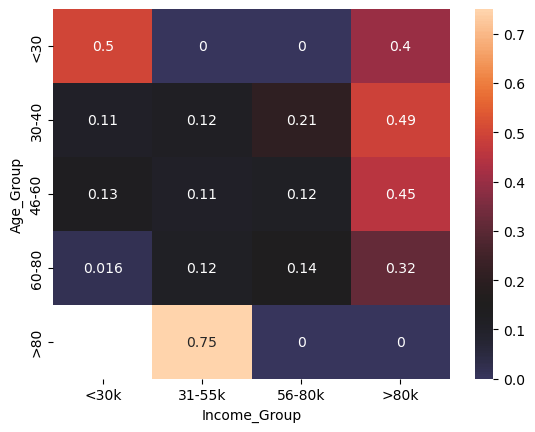

In [144]:
pt_income_age=pd.pivot_table(data=df_data,index='Age_Group',columns='Income_Group',values='Response_Flag')
sns.heatmap(pt_income_age,annot=True,center=df_data['Response'].mean())

In [145]:
# Inference --1.Age group ">80" in the income category "<31000-55000" has a very high acceptance ratio (0.75).
#             2.Age Group <30 with income ranges "<30000" and ">80000" show moderate acceptance ratios (0.5 and 0.4 respectively).

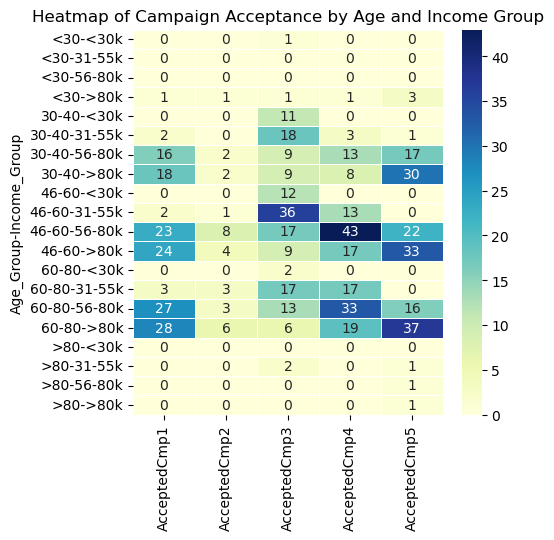

In [146]:
pivot_table_campaigns = pd.pivot_table(
    df_data,
    values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],
    index=['Age_Group','Income_Group'],
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(5, 5))
sns.heatmap(pivot_table_campaigns, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Campaign Acceptance by Age and Income Group')
plt.show()

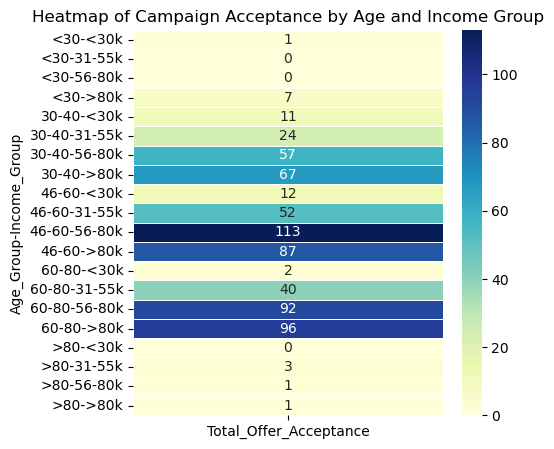

In [147]:
pivot_table_campaigns = pd.pivot_table(
    df_data,
    values=['Total_Offer_Acceptance'],
    index=['Age_Group','Income_Group'],
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(5, 5))
sns.heatmap(pivot_table_campaigns, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Campaign Acceptance by Age and Income Group')
plt.show()

In [148]:
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
response = 'Response_Flag'
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

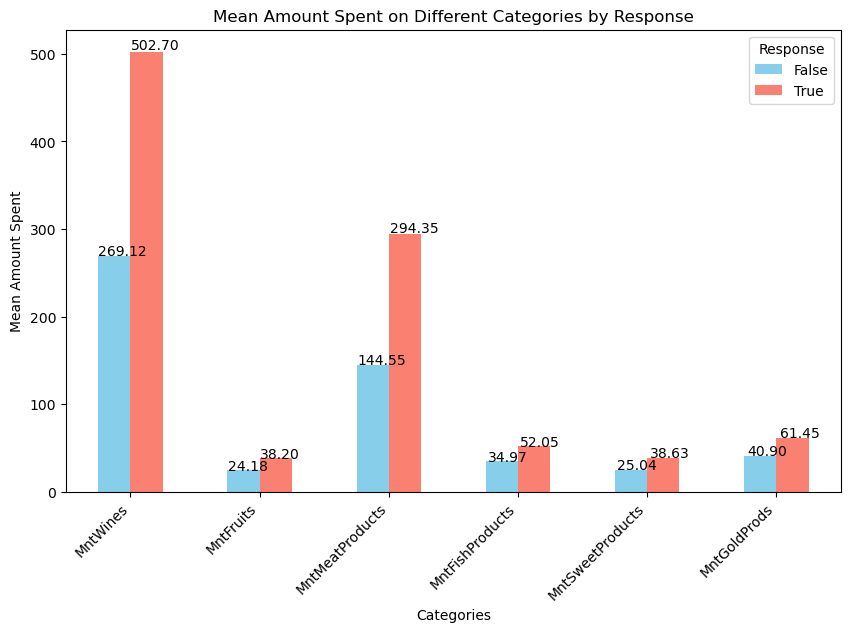

In [149]:
# Calculate the mean amount spent on different categories by response
mean_spent = df_data.groupby('Response_Flag')[categories].mean()
mean_spent_T = mean_spent.T

# Plot the results
ax1 = mean_spent_T.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Mean Amount Spent on Different Categories by Response')
plt.xlabel('Categories')
plt.ylabel('Mean Amount Spent')

# Add labels to the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xticks(rotation=45, ha='right')
plt.legend(title='Response', loc='upper right')
plt.show()

# Task2

# Q1 -Generate and check hypothesis around Amount Spent on different categories and response rate in different marketing campaigns.

In [150]:
from scipy.stats import ttest_ind,chi2_contingency

In [151]:
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Ensure 'Response_Flag' is correctly set
df_data['Response_Flag'] = np.where(df_data['Response'] == 1, 'Responded', 'Did Not Respond')

# Calculate mean spent
mean_spent = df_data.groupby('Response_Flag')[categories].mean()
print("Mean Amount Spent on Different Categories by Response: \n")
print(mean_spent)

# Perform t-tests and collect results
results = []
for category in categories:
    responders = df_data[df_data['Response_Flag'] == 'Responded'][category]
    non_responders = df_data[df_data['Response_Flag'] == 'Did Not Respond'][category]
    
    # Check for constant values
    if responders.std() == 0 and non_responders.std() == 0:
        t_stat, p_value = np.nan, np.nan
        status = "Both groups constant"
    elif responders.std() == 0 or non_responders.std() == 0:
        t_stat, p_value = np.nan, np.nan
        status = "One group constant"
    else:
        t_stat, p_value = stats.ttest_ind(responders, non_responders, equal_var=False, nan_policy='omit')
        status = "Test performed"
    
    results.append({
        'Category': category,
        'Status': status,
        'p_value': p_value,
        'Responders_Mean': responders.mean(),
        'Non_Responders_Mean': non_responders.mean(),
        'Responders_Count': responders.count(),
        'Non_Responders_Count': non_responders.count()
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Format the DataFrame
results_df['p_value'] = results_df['p_value'].apply(lambda x: f"{x:.4f}" if not pd.isna(x) else "N/A")
results_df['Responders_Mean'] = results_df['Responders_Mean'].round(2)
results_df['Non_Responders_Mean'] = results_df['Non_Responders_Mean'].round(2)

# Reorder columns
column_order = ['Category', 'Status', 'p_value', 'Responders_Mean', 'Non_Responders_Mean', 'Responders_Count', 'Non_Responders_Count']
results_df = results_df[column_order]

# Print the results in tabular form
print("\nT-Test Results for Amount Spent on Different Categories:\n")
print(results_df.to_string(index=False))

Mean Amount Spent on Different Categories by Response: 

                   MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Response_Flag                                                              
Did Not Respond  269.119811  24.176038       144.550184        34.973200   
Responded        502.703593  38.203593       294.353293        52.050898   

                 MntSweetProducts  MntGoldProds  
Response_Flag                                    
Did Not Respond         25.038886     40.901209  
Responded               38.634731     61.446108  

T-Test Results for Amount Spent on Different Categories:

        Category         Status p_value  Responders_Mean  Non_Responders_Mean  Responders_Count  Non_Responders_Count
        MntWines Test performed  0.0000           502.70               269.12               334                  1903
       MntFruits Test performed  0.0000            38.20                24.18               334                  1903
 MntMeatProducts Test per

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\2655289506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Response_Flag'] = np.where(df_data['Response'] == 1, 'Responded', 'Did Not Respond')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\3426024143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Total_Spent'] = df_data['MntWines'] + df_data['MntFruits'] + df_data['MntMeatProducts'] + \


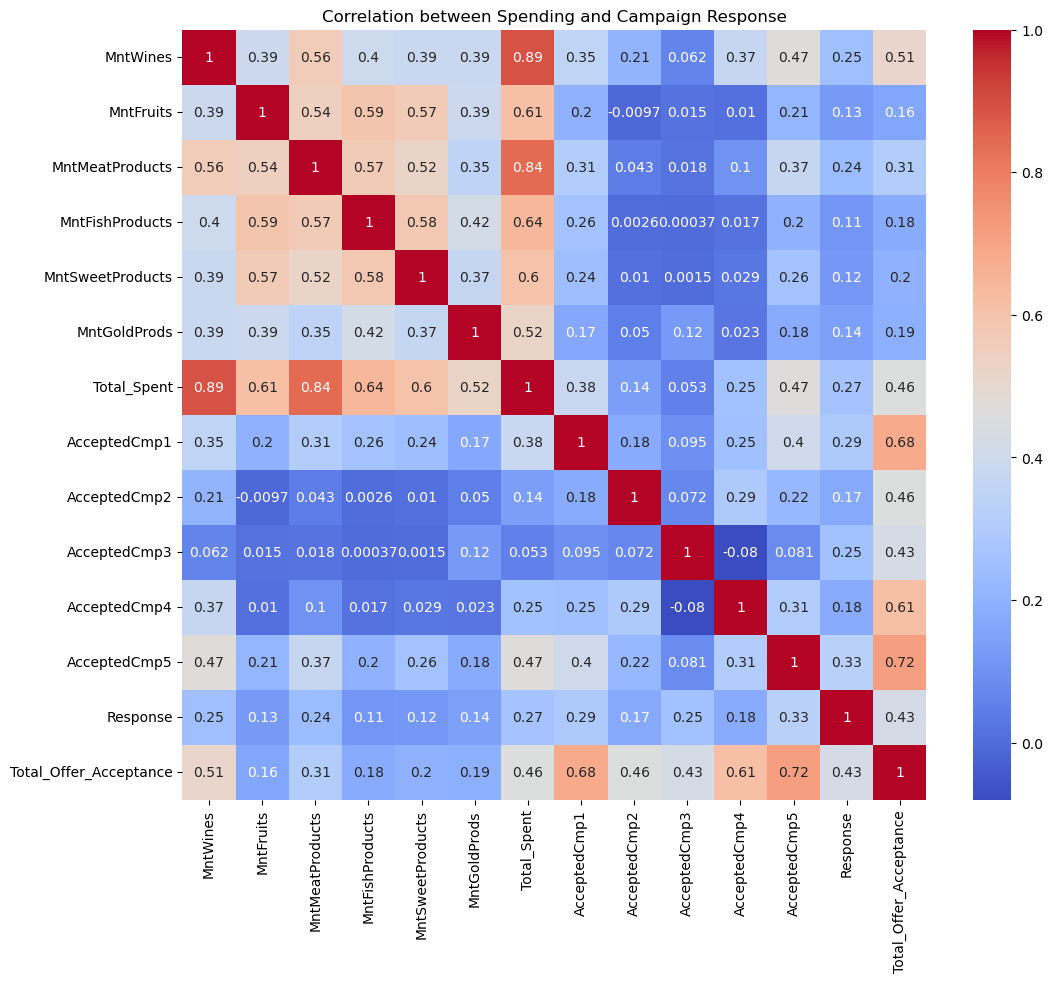

In [152]:
df_data['Total_Spent'] = df_data['MntWines'] + df_data['MntFruits'] + df_data['MntMeatProducts'] + \
                   df_data['MntFishProducts'] + df_data['MntSweetProducts'] + df_data['MntGoldProds']



# Correlation between spending and response
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
              'MntSweetProducts', 'MntGoldProds', 'Total_Spent']
response_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                 'AcceptedCmp5', 'Response', 'Total_Offer_Acceptance']

corr_matrix = df_data[spend_cols + response_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Spending and Campaign Response')
plt.show()

In [153]:
# Mean spending across different categories w.r.t response

results = []

for campaign in response_cols:
    responders = df_data[df_data[campaign] == 1]['Total_Spent']
    non_responders = df_data[df_data[campaign] == 0]['Total_Spent']
    t_stat, p_value = stats.ttest_ind(responders, non_responders)
    
    results.append({
        'Campaign': campaign,
        'Responders Mean Spending': responders.mean(),
        'Non-responders Mean Spending': non_responders.mean(),
        'T-statistic': t_stat,
        'p-value': p_value
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Format the DataFrame
results_df['Responders Mean Spending'] = results_df['Responders Mean Spending'].round(2)
results_df['Non-responders Mean Spending'] = results_df['Non-responders Mean Spending'].round(2)
results_df['T-statistic'] = results_df['T-statistic'].round(2)
results_df['p-value'] = results_df['p-value'].round(4)

# Display the results in a tabular form
print(results_df.to_string(index=False))

              Campaign  Responders Mean Spending  Non-responders Mean Spending  T-statistic  p-value
          AcceptedCmp1                   1482.22                        545.44        19.55   0.0000
          AcceptedCmp2                   1307.67                        596.20         6.49   0.0000
          AcceptedCmp3                    720.54                        596.72         2.53   0.0114
          AcceptedCmp4                   1143.13                        562.39        12.40   0.0000
          AcceptedCmp5                   1614.65                        526.98        25.07   0.0000
              Response                    987.39                        538.76        13.03   0.0000
Total_Offer_Acceptance                    918.65                        478.29        13.61   0.0000


In [154]:
# Hypothesis 2: Response rates for different campaigns
response_rate = df_data[campaigns].mean() * 100
print("\nResponse Rate for Different Marketing Campaigns:")
print(response_rate)

chi2_results = {}
for campaign in campaigns:
    contingency_table = pd.crosstab(df_data[campaign], df_data['Response_Flag'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[campaign] = p

# Print chi2 test results
print("\nChi-Square Test Results for Campaign Response Rates:")
for campaign, p_value in chi2_results.items():
    print(f"{campaign}: p-value = {p_value:.4f}")


Response Rate for Different Marketing Campaigns:
AcceptedCmp1    6.437193
AcceptedCmp2    1.341082
AcceptedCmp3    7.286544
AcceptedCmp4    7.465355
AcceptedCmp5    7.241842
dtype: float64

Chi-Square Test Results for Campaign Response Rates:
AcceptedCmp1: p-value = 0.0000
AcceptedCmp2: p-value = 0.0000
AcceptedCmp3: p-value = 0.0000
AcceptedCmp4: p-value = 0.0000
AcceptedCmp5: p-value = 0.0000


# Q-2 Create a funnel analysis showing what percentage of unique customers accept campaign 1,2, 3,..etc

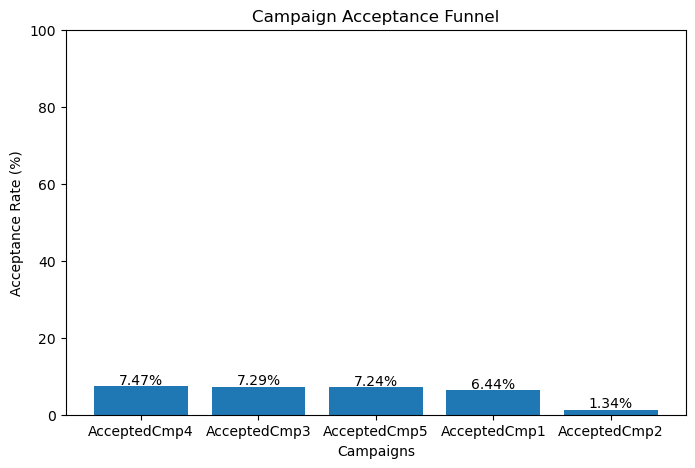

In [155]:
# Ensure each customer is counted once
unique_customers = df_data.drop_duplicates(subset='ID')

# Calculate acceptance rates for each campaign
total_customers = len(df_data)
acceptance_rates = []

for campaign in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    accepted = df_data[campaign].sum()
    rate = (accepted / total_customers) * 100
    acceptance_rates.append((campaign, rate))

# Sort rates in descending order
acceptance_rates.sort(key=lambda x: x[1], reverse=True)

# Create funnel chart
campaigns, rates = zip(*acceptance_rates)
plt.figure(figsize=(8, 5))
plt.bar(campaigns, rates)
plt.title('Campaign Acceptance Funnel')
plt.xlabel('Campaigns')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
for i, v in enumerate(rates):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.show()



# Q3: Find out how income impacts the amount spent on - Wine - Meat Products - Gold Products - Fish Products

In [156]:
# Calculate mean spending on each product category for each income group
mean_spending = df_data.groupby('Income_Group').agg({
    'MntWines': 'mean',
    'MntMeatProducts': 'mean',
    'MntGoldProds': 'mean',
    'MntFishProducts': 'mean'
}).reset_index()

# Display the results
print(mean_spending)

  Income_Group    MntWines  MntMeatProducts  MntGoldProds  MntFishProducts
0         <30k   13.781081        21.462162     16.994595         8.010811
1       31-55k  131.049312        51.126147     28.889908        13.868119
2       56-80k  529.204108       267.083440     66.729140        63.061617
3         >80k  687.101852       522.277778     68.962963        91.467593


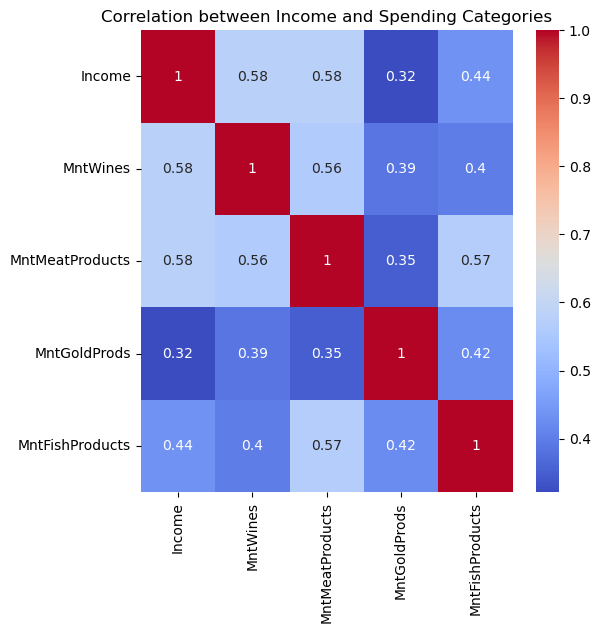

In [157]:
# Calculate average spending for each income bracket
spend_cols = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts']
avg_spending = df_data.groupby('Income_Group')[spend_cols].mean()

# Correlation analysis
correlation_matrix = df_data[['Income'] + spend_cols].corr()

#correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Income and Spending Categories')
plt.show()

# Q4 :Can you test the hypothesis that recent customers complain less in general compared to older customers?

In [158]:
# Calculate customer tenure
current_date = pd.Timestamp.now()
df_data['Dt_Customer'] = pd.to_datetime(df_data['Dt_Customer'], errors='coerce')
df_data['Tenure'] = (current_date - df_data['Dt_Customer']).dt.days

# Define recent customers (e.g., less than 1 year)
df_data['IsRecent'] = df_data['Tenure'] <= 365

# Check if 'IsRecent' column was created successfully
if 'IsRecent' not in df_data.columns:
    print("Error: 'IsRecent' column was not created. Check the 'Dt_Customer' column for invalid dates.")
else:
    # Compare complaint rates
    recent_complaints = df_data[df_data['IsRecent']]['Complain'].mean()
    older_complaints = df_data[~df_data['IsRecent']]['Complain'].mean()
    
    # Perform chi-square test
    contingency_table = pd.crosstab(df_data['IsRecent'], df_data['Complain'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # Create results DataFrame
    results_df = pd.DataFrame({
        'Customer Group': ['Recent', 'Older'],
        'Complaint Rate': [recent_complaints, older_complaints],
        'Sample Size': [df_data['IsRecent'].sum(), (~df_data['IsRecent']).sum()]
    })
    results_df['Complaint Rate'] = results_df['Complaint Rate'].apply(lambda x: f"{x:.2%}")
    
    # Create chi-square results DataFrame
    chi_square_results = pd.DataFrame({
        'Statistic': ['Chi-square', 'p-value', 'Degrees of Freedom'],
        'Value': [f"{chi2:.2f}", f"{p_value:.4f}", f"{dof}"]
    })

    # Print results
    print("Complaint Rates:")
    print(results_df.to_string(index=False))
    print("\nChi-square Test Results:")
    print(chi_square_results.to_string(index=False))

    # Hypothesis test conclusion
    print("\nHypothesis Test:")
    if p_value < 0.05:
        if recent_complaints < older_complaints:
            print("Reject the null hypothesis: Recent customers complain significantly less compared to older customers.")
        else:
            print("Reject the null hypothesis: Recent customers complain significantly more compared to older customers.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in complaint rates between recent and older customers.")

    # Additional interpretation
    
    print("\nInterpretation:")
    print(f"Recent customers have a complaint rate of {recent_complaints:.2%}, while older customers have a complaint rate of {older_complaints:.2%}.")
    print(f"The chi-square test yielded a p-value of {p_value:.4f}.")
    if p_value < 0.05:
        print("This suggests a statistically significant difference in complaint rates between the two groups.")
    else:
        print("This suggests no statistically significant difference in complaint rates between the two groups.")


Complaint Rates:
Customer Group Complaint Rate  Sample Size
        Recent           nan%            0
         Older          0.89%         2237

Chi-square Test Results:
         Statistic  Value
        Chi-square   0.00
           p-value 1.0000
Degrees of Freedom      0

Hypothesis Test:
Fail to reject the null hypothesis: There is no significant difference in complaint rates between recent and older customers.

Interpretation:
Recent customers have a complaint rate of nan%, while older customers have a complaint rate of 0.89%.
The chi-square test yielded a p-value of 1.0000.
This suggests no statistically significant difference in complaint rates between the two groups.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\128802322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Dt_Customer'] = pd.to_datetime(df_data['Dt_Customer'], errors='coerce')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\128802322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Tenure'] = (current_date - df_data['Dt_Customer']).dt.days
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6052\128802322.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

# Q5:Do people who accept the offer in the first campaign also accept in any other campaign?

In [159]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
if not all(col in df_data.columns for col in campaign_columns):
    raise ValueError(f"DataFrame must contain the following columns: {', '.join(campaign_columns)}")

# Identify customers who accepted the first campaign
accepted_first_campaign = df_data[df_data['AcceptedCmp1'] == 1]

# Check acceptance in other campaigns
accepted_other_campaigns = accepted_first_campaign[
    (accepted_first_campaign['AcceptedCmp2'] == 1) |
    (accepted_first_campaign['AcceptedCmp3'] == 1) |
    (accepted_first_campaign['AcceptedCmp4'] == 1) |
    (accepted_first_campaign['AcceptedCmp5'] == 1)
]

# Calculate the proportion
total_accepted_first_campaign = accepted_first_campaign.shape[0]
accepted_other_campaigns_count = accepted_other_campaigns.shape[0]

# Ensure we don't divide by zero
if total_accepted_first_campaign > 0:
    proportion = (accepted_other_campaigns_count / total_accepted_first_campaign) * 100
else:
    proportion = 0

# Display the results
print(f"Total customers who accepted the first campaign: {total_accepted_first_campaign}")
print(f"Customers who accepted the first campaign and also accepted any other campaign: {accepted_other_campaigns_count}")
print(f"Proportion: {proportion:.2f}%")


Total customers who accepted the first campaign: 144
Customers who accepted the first campaign and also accepted any other campaign: 92
Proportion: 63.89%


# Q6: Profile of people who respond vs. who don’t.

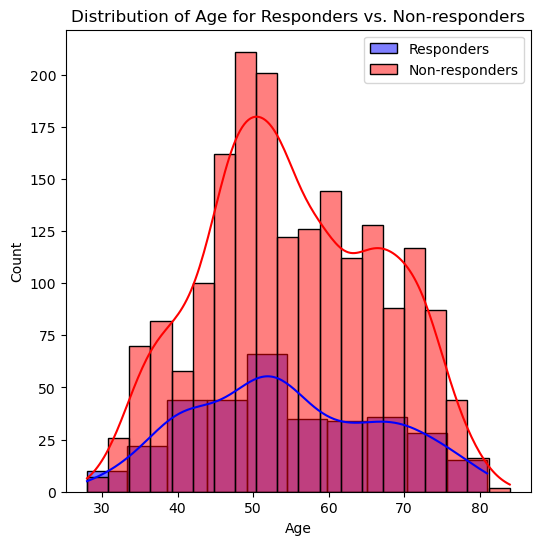

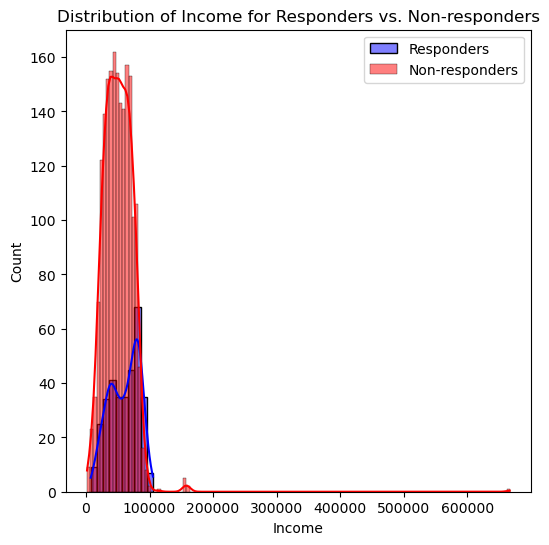

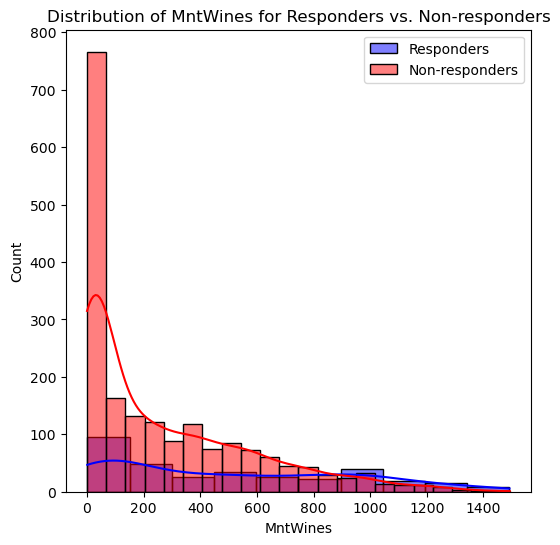

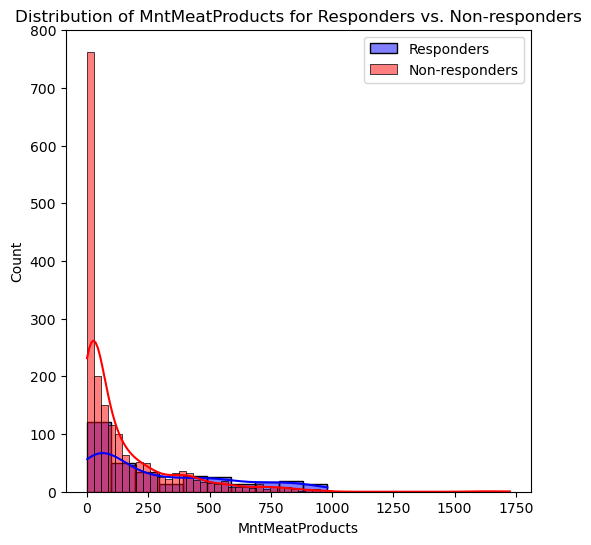

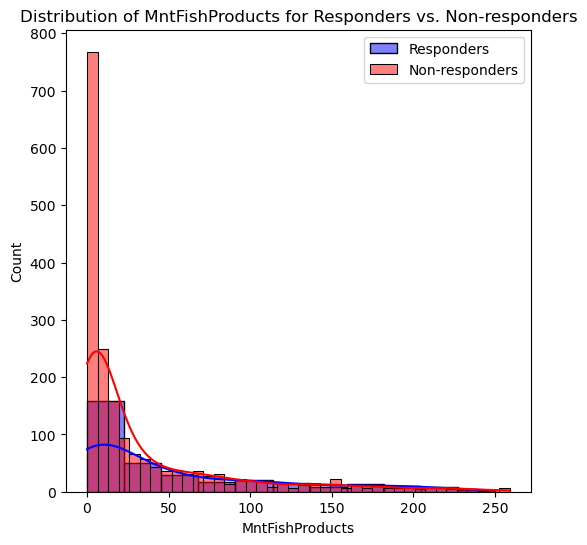

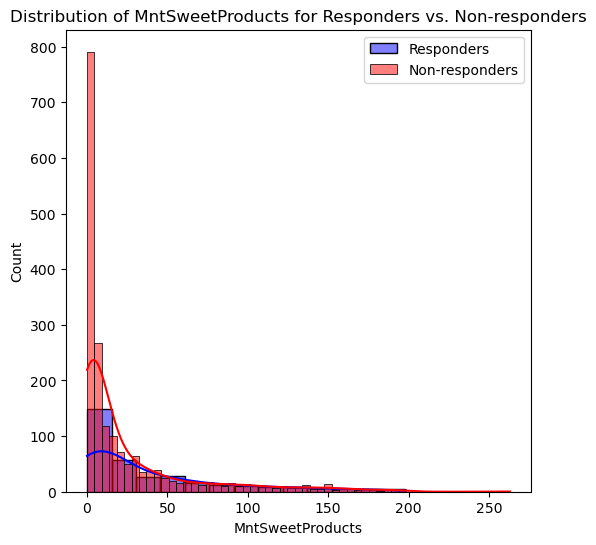

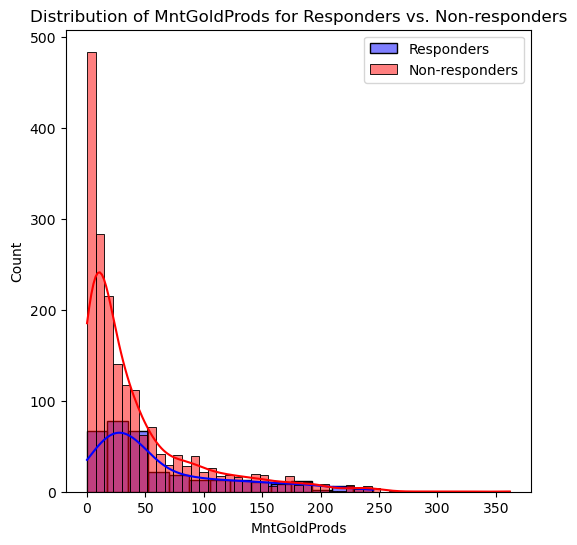

In [160]:
required_columns = ['Response', 'Age', 'Income', 'Education', 'Marital_Status', 'MntWines', 'MntMeatProducts','MntFishProducts','MntSweetProducts', 'MntGoldProds']
if not all(col in df_data.columns for col in required_columns):
    raise ValueError(f"DataFrame must contain the following columns: {', '.join(required_columns)}")

# Define responders and non-responders
responders = df_data[df_data['Response'] == 1]
non_responders = df_data[df_data['Response'] == 0]

# Analyze profile characteristics
profile_characteristics = ['Age', 'Income', 'MntWines', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Compare distributions or means
for characteristic in profile_characteristics:
    plt.figure(figsize=(6, 6))
    sns.histplot(responders[characteristic], label='Responders', kde=True, color='blue', alpha=0.5)
    sns.histplot(non_responders[characteristic], label='Non-responders', kde=True, color='red', alpha=0.5)
    plt.title(f'Distribution of {characteristic} for Responders vs. Non-responders')
    plt.legend()
    plt.show()


In [161]:
for col in profile_characteristics:
    if col not in responders.columns or col not in non_responders.columns:
        raise ValueError(f"Column {col} not found in DataFrame")

# Compare summary statistics
summary_statistics = pd.DataFrame({
    'Characteristic': profile_characteristics,
    'Mean Responders': responders[profile_characteristics].mean(),
    'Mean Non-responders': non_responders[profile_characteristics].mean()
})

print(summary_statistics)

                    Characteristic  Mean Responders  Mean Non-responders
Age                            Age        54.583832            55.188650
Income                      Income     60183.244012         50831.060168
MntWines                  MntWines       502.703593           269.119811
MntMeatProducts    MntMeatProducts       294.353293           144.550184
MntFishProducts    MntFishProducts        52.050898            34.973200
MntSweetProducts  MntSweetProducts        38.634731            25.038886
MntGoldProds          MntGoldProds        61.446108            40.901209


# Chi- Square Test

In [162]:
import itertools

In [163]:
categorical_columns = ['Education','Marital_Status', 'Kidhome', 'Teenhome','Country','Complain','AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Income_Group','Age_Group']

# Initialize a list to store results
results = []

# Iterate through each categorical column and perform Chi-Square test with 'Response'
for col in categorical_columns:
    try:
        contingency_table = pd.crosstab(df_data[col], df_data['Response'])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        
        # Convert p-value to absolute value and percentage
        p_absolute = abs(p)
        p_percentage = p * 100

        results.append({
            'Variable': col,
            'Chi-Square Statistic': chi2,
            'p-value': p,
            'Degrees of Freedom': dof,
            'Significant': p < 0.05
        })
    except Exception as e:
        print(f"Error processing column ({col}): {e}")

# Convert results to a DataFrame and print
results_df1 = pd.DataFrame(results)
print(results_df1)





          Variable  Chi-Square Statistic       p-value  Degrees of Freedom  \
0        Education             23.052288  1.236166e-04                   4   
1   Marital_Status             54.088612  2.009753e-10                   5   
2          Kidhome             14.677104  6.499910e-04                   2   
3         Teenhome             58.471729  2.009210e-13                   2   
4          Country             12.829893  7.636308e-02                   7   
5         Complain              0.000000  1.000000e+00                   1   
6     AcceptedCmp1            189.857292  3.415711e-43                   1   
7     AcceptedCmp2             60.017026  9.404035e-15                   1   
8     AcceptedCmp3            141.755686  1.099771e-32                   1   
9     AcceptedCmp4             68.119896  1.538505e-16                   1   
10    AcceptedCmp5            237.392929  1.456050e-53                   1   
11    Income_Group            124.199895  9.611508e-27          

In [164]:
# Identify Significant Columns (p-value < 0.05)
significant_columns = results_df1[results_df1['Significant']]['Variable'].tolist()

# Exclude Non-Significant Columns from the DataFrame
df_filtered = df_data[significant_columns + ['Response']]  # Include 'Response' for modeling

print("Significant Columns for Modeling:")
print(significant_columns)

Significant Columns for Modeling:
['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Income_Group']


In [165]:
import sklearn


In [166]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier


In [167]:
X = df_filtered.drop('Response', axis=1)  # Features
y = df_filtered['Response']  # Target variable

# Convert categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and run LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the performance of all models
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.66it/s]

[LightGBM] [Info] Number of positive: 265, number of negative: 1524
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 1789, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148127 -> initscore=-1.749364
[LightGBM] [Info] Start training from score -1.749364
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.81               0.72     0.72      0.82   
GaussianNB                         0.81               0.72     0.72      0.82   
NearestCentroid                    0.81               0.70     0.70      0.82   
LinearDiscriminantAnalysis         0.88    

In [168]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Prepare the data (assuming df_filtered is already defined and contains significant columns)
X = df_filtered.drop('Response', axis=1)  # Features
y = df_filtered['Response']  # Target variable

# Convert categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets before resampling
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [169]:
y_train.value_counts()

0    1524
1     265
Name: Response, dtype: int64

In [170]:
y_train_res.value_counts()

0    1524
1    1524
Name: Response, dtype: int64

In [171]:
# Feature Engineering: Total Children
df_data['Total_Children'] = df_data['Kidhome'] + df_data['Teenhome']


In [172]:
list_cat_var =df_data.select_dtypes(include=["object"]).columns
print(list_cat_var)

Index(['ID', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Country',
       'Response_Flag', 'Total_Children'],
      dtype='object')


In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
from sklearn.preprocessing import LabelEncoder

In [175]:
le =LabelEncoder()
for i in list_cat_var:
    df_data[i]=le.fit_transform(df_data[i])

In [176]:
# Assuming 'Response' is the target variable
y = df_data["Response"]
X = df_data.drop("Response",axis =1)

In [177]:
from sklearn.model_selection import train_test_split

In [178]:

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [179]:
from sklearn.linear_model import LogisticRegression